# Part A: Data preparation (Data Cleaning and Data Preprocessing)
## Step 1: Import two-second-wbgt dataset.

In [2]:
import pandas as pd
import math
df = pd.read_csv("../Machine_Learning\Dataset\\two-second-wbgt.csv",header=None)
df

,0
0,24.499889
1,24.499778
2,24.499667
3,24.499556
4,24.499444
...,...
14513395,24.699556
14513396,24.699667
14513397,24.699778
14513398,24.699889


## Step 2: Remove unessary data set. Only requires last X hours dataset.


In [3]:
hours = 48
no_of_dataset_required = hours * 60 * 60
print('Number of dataset required = %d' % (no_of_dataset_required))
df_trimmed = df.tail(no_of_dataset_required)
headers =  ["two_second_wbgt"]
df_trimmed.columns = headers
df_trimmed.reset_index(drop=True,inplace=True)
df_trimmed

Number of dataset required = 172800


,two_second_wbgt
0,23.799778
1,23.799556
2,23.799333
3,23.799111
4,23.798889
...,...
172795,24.699556
172796,24.699667
172797,24.699778
172798,24.699889


## Step 3: Check for missing data <br>
i)Identify if attributes have missing data

ii)count the number of missing values in each of these attributes

In [4]:
import numpy as np

df_check_null = df_trimmed.replace('?',np.NaN)

print('Number of instances = %d' % (df_check_null.shape[0]))
print('Number of attributes = %d' % (df_check_null.shape[1]))

print('Number of missing values:')
for col in df_check_null.columns:
    print('\t%s: %d' % (col,df_check_null[col].isna().sum()))

Number of instances = 172800
Number of attributes = 1
Number of missing values:
	two_second_wbgt: 0


## Step 4: Drop missing data if any exists

In [5]:
print('Number of rows in original data = %d' % (df_check_null.shape[0]))
df_drop_null = df_check_null.dropna()
print('Number of rows after discarding missing values = %d' % (df_drop_null.shape[0]))

Number of rows in original data = 172800
Number of rows after discarding missing values = 172800


## Step 6: Create visual representation / chart for trimmed dataset.

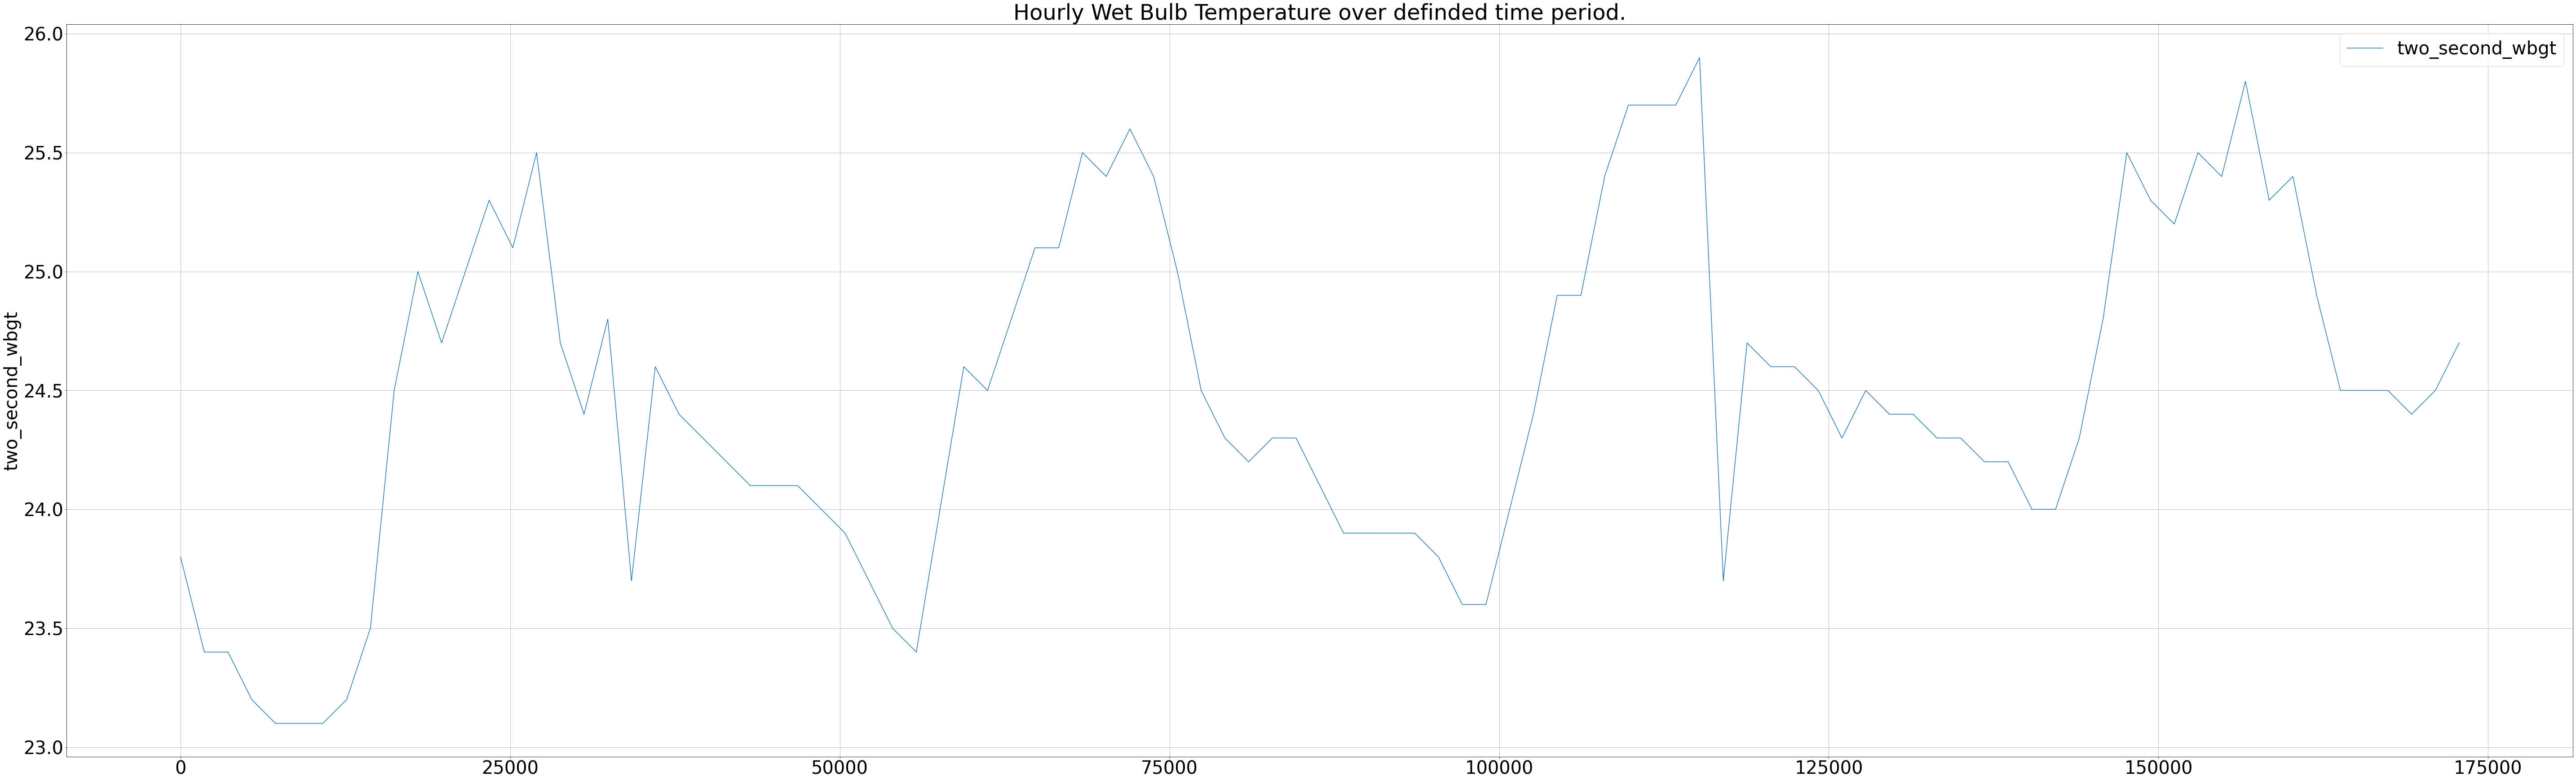

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 40})
df_drop_null.plot(use_index=True, y='two_second_wbgt', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,30), grid =True)
plt.ylabel('two_second_wbgt')	
plt.show()

## Step 7: Create labels for WBGT readings according to SAF Work Rest Cycle Guidelines


<img src="SAFWorkRestCycle.png" width=1080 height=400>


In [7]:
df_clean_data = df_drop_null.copy()
df_original_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 33.0
wbt_high_risk_red = 32.0
wbt_medium_risk_yellow = 31.0
wbt_low_risk_green = 30.0
wbt_low_risk_white =  29.9
risk_level = []

for row in df_original_threshold.index:
    if(df_original_threshold['two_second_wbgt'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_original_threshold['two_second_wbgt'][row]>=wbt_high_risk_red) & (df_original_threshold['two_second_wbgt'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_original_threshold['two_second_wbgt'][row]>=wbt_medium_risk_yellow) & (df_original_threshold['two_second_wbgt'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_original_threshold['two_second_wbgt'][row]>=wbt_low_risk_green) & (df_original_threshold['two_second_wbgt'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_original_threshold['two_second_wbgt'][row]<wbt_low_risk_green)):
        risk_level.append('low_white')

df_original_threshold['risk_level'] = risk_level
df_original_threshold


,two_second_wbgt,risk_level
0,23.799778,low_white
1,23.799556,low_white
2,23.799333,low_white
3,23.799111,low_white
4,23.798889,low_white
...,...,...
172795,24.699556,low_white
172796,24.699667,low_white
172797,24.699778,low_white
172798,24.699889,low_white


## Step 7.a: Show count of each risk level

In [8]:
risk_high_black = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_original_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)


number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df_original_threshold["two_second_wbgt"]
highest_wbgt_reading = column.max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Original Threshold)= %d' % total)
print('Total count of clean data = %d' % df_original_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 0
Count of high risk (Red)= 0
Count of medium risk (Yellow)= 0
Count of low risk (Green)= 0
Count of low risk (White)= 172800
Total count of all risk (Original Threshold)= 172800
Total count of clean data = 172800
Highest WBGT readings = 25.90


# Step 8: Modify threshold limits

As the orginal dataset and SAF work rest cycle labels all of the data point as "Super Low Risk", no meaningful data / labels can be extrapolated.


Hence, lowering the threshold of "risk_high_black" according to the maximum WBGT datapoint and creating an interval of 1°C for risk_high_black, risk_high_red, risk_medium_yellow, risk_low_green, risk_low_white

I.E.

risk_high_black = 29.0 <br>
risk_high_red = 28.0 <br>
risk_medium_yellow = 27.0 <br>
risk_low_green = 26.0 <br>
risk_low_white = 25.9 <br>

<img src="SAFWorkRestCycle.png" width=1080 height=400>

In [9]:
df_modified_threshold = df_clean_data.copy() #Clean data before data processing

wbt_high_risk_black = 28.0
wbt_high_risk_red = 27.0
wbt_medium_risk_yellow = 26.0
wbt_low_risk_green = 25.0
wbt_low_risk_white =  24.9
risk_level = []

for row in df_modified_threshold.index:
    if(df_modified_threshold['two_second_wbgt'][row]>=wbt_high_risk_black):
        risk_level.append('high_black')
    elif((df_modified_threshold['two_second_wbgt'][row]>=wbt_high_risk_red) & (df_modified_threshold['two_second_wbgt'][row]<wbt_high_risk_black)):
        risk_level.append('high_red')
    elif((df_modified_threshold['two_second_wbgt'][row]>=wbt_medium_risk_yellow) & (df_modified_threshold['two_second_wbgt'][row]<wbt_high_risk_red)):
        risk_level.append('medium_yellow')
    elif((df_modified_threshold['two_second_wbgt'][row]>=wbt_low_risk_green) & (df_modified_threshold['two_second_wbgt'][row]<wbt_medium_risk_yellow)):
        risk_level.append('low_green')
    elif((df_modified_threshold['two_second_wbgt'][row]<wbt_low_risk_green)):
        risk_level.append('low_white')

df_modified_threshold['risk_level'] = risk_level
df_modified_threshold

,two_second_wbgt,risk_level
0,23.799778,low_white
1,23.799556,low_white
2,23.799333,low_white
3,23.799111,low_white
4,23.798889,low_white
...,...,...
172795,24.699556,low_white
172796,24.699667,low_white
172797,24.699778,low_white
172798,24.699889,low_white


## Step 8.a: Show count of each risk level (Modified threshold)

In [10]:
risk_high_black = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_black' else False , axis=1)
risk_high_red = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'high_red' else False , axis=1)
risk_medium_yellow = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'medium_yellow' else False , axis=1)
risk_low_green = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_green' else False , axis=1)
risk_low_white = df_modified_threshold.apply(lambda x: True if x['risk_level'] == 'low_white' else False , axis=1)

number_of_high_black = len(risk_high_black[risk_high_black==True].index)
number_of_high_red = len(risk_high_red[risk_high_red==True].index)
number_of_medium_yellow = len(risk_medium_yellow[risk_medium_yellow==True].index)
number_of_low_green = len(risk_low_green[risk_low_green==True].index)
number_of_low_white = len(risk_low_white[risk_low_white==True].index)

total = number_of_high_black +number_of_high_red +number_of_medium_yellow+number_of_low_green+number_of_low_white

column = df_modified_threshold["two_second_wbgt"]
highest_wbgt_reading = column. max()

print('Count of high risk (Black) = %d' % number_of_high_black)
print('Count of high risk (Red)= %d' % number_of_high_red)
print('Count of medium risk (Yellow)= %d' % number_of_medium_yellow)
print('Count of low risk (Green)= %d' % number_of_low_green)
print('Count of low risk (White)= %d' % number_of_low_white)

print('Total count of all risk (Modified Threshold)= %d' % total)
print('Total count of clean data = %d' % df_modified_threshold.shape[0])
print('Highest WBGT readings = %.2f' % highest_wbgt_reading)

Count of high risk (Black) = 0
Count of high risk (Red)= 0
Count of medium risk (Yellow)= 0
Count of low risk (Green)= 42630
Count of low risk (White)= 130170
Total count of all risk (Modified Threshold)= 172800
Total count of clean data = 172800
Highest WBGT readings = 25.90


In [11]:
df_modified_threshold.shape[0]

172800

In [12]:
window_value = math.floor(df_modified_threshold.shape[0] * 0.8)
rolmean = df_modified_threshold.rolling(window=window_value).mean()
rolstd = df_modified_threshold.rolling(window=window_value).std()
print(window_value)
#print(rolmean, rolstd)

138240


In [13]:
df_timeseries = df_modified_threshold.copy()
# #df_timeseries.insert(0, 'ID', range(1, 1 + len(df_timeseries)))

# df_timeseries.drop(['wbt_date','wbt_time','risk_level'],axis=1, inplace=True)
# df_timeseries.reset_index(drop=True,inplace=True)
# df_timeseries.describe()

In [14]:
df_timeseries

,two_second_wbgt,risk_level
0,23.799778,low_white
1,23.799556,low_white
2,23.799333,low_white
3,23.799111,low_white
4,23.798889,low_white
...,...,...
172795,24.699556,low_white
172796,24.699667,low_white
172797,24.699778,low_white
172798,24.699889,low_white


In [15]:
# time_in_seconds= []
# for i in range(df_timeseries.size):
#     time_in_seconds.append(i*3600)



In [16]:

# df_timeseries_seconds = df_timeseries.copy()
# df_timeseries_seconds['time_in_seconds'] = time_in_seconds
# df_timeseries_seconds

In [17]:
# for i in range(len(df_timeseries_seconds)):
#     if i+1 != len(df_timeseries_seconds):
#         # Gradient = Change in Y / Change in X
#         change_in_y = (df_timeseries_seconds.iloc[i]['wet_bulb_temperature'] - df_timeseries_seconds.iloc[i+1]['wet_bulb_temperature'])
#         change_in_x = (df_timeseries_seconds.iloc[i]['time_in_seconds'] - df_timeseries_seconds.iloc[i+1]['time_in_seconds'])
#         gradient = change_in_y / change_in_x
#         y_intercept = (df_timeseries_seconds.iloc[i+1]['wet_bulb_temperature'] - (gradient *df_timeseries_seconds.iloc[i+1]['time_in_seconds']))
#         df_timeseries_seconds.loc[df_timeseries_seconds.index[i+1], 'gradient_m'] = gradient
#         df_timeseries_seconds.loc[df_timeseries_seconds.index[i+1], 'y_intercept'] = y_intercept
#         df_timeseries_seconds.loc[df_timeseries_seconds.index[i+1], 'equation'] = f'y = {gradient:.2f} * x + {y_intercept:.2f}'

# df_timeseries_seconds

        

In [18]:

# two_second_wbgt =[]
# interval_time=[]
# df_two_seconds = df_timeseries_seconds.copy()
# polling_interval = 2
# for i in range(len(df_two_seconds)):
#     if i+1 != len(df_two_seconds):
#         while (polling_interval >= df_two_seconds.iloc[i]['time_in_seconds'] and polling_interval <= df_two_seconds.iloc[i+1]['time_in_seconds']):        
#             calculated_two_second_wbgt = (df_two_seconds.iloc[i+1]['gradient_m']*polling_interval) + df_two_seconds.iloc[i+1]['y_intercept']
#             two_second_wbgt.append(calculated_two_second_wbgt)
#             interval_time.append(polling_interval)
#             #df_calculated_two_seconds.append({'interval_time':polling_interval,'two_second_wbgt':calculated_two_second_wbgt}, ignore_index=True)
#             polling_interval = polling_interval + 2
#             print('polling interval = ', polling_interval)
            
# interval_array = np.array(interval_time)
# wbgt_array = np.array(two_second_wbgt)
# df_calculated_two_seconds = pd.DataFrame()
# df_calculated_two_seconds['interval_time'] = interval_array.tolist()
# df_calculated_two_seconds['wet_bulb_temperature'] = wbgt_array.tolist()

In [19]:
# df_calculated_two_seconds = pd.read_csv("../Machine_Learning\Dataset\\two-second-wbgt.csv", header=None)
# df_calculated_two_seconds.columns=['two_second_wbgt']
# df_calculated_two_seconds

In [20]:
# df_calculated_two_seconds.to_csv('two-second-wbgt.csv', sep='\t', encoding='utf-8')

In [21]:
# plt.rcParams.update({'font.size': 40})
# df_calculated_two_seconds.plot(y='two_second_wbgt', kind = 'line', title='Hourly Wet Bulb Temperature over definded time period.', figsize =(100,30), grid =True)
# plt.ylabel('two_second_wbgt')	
# plt.show()

<AxesSubplot:>

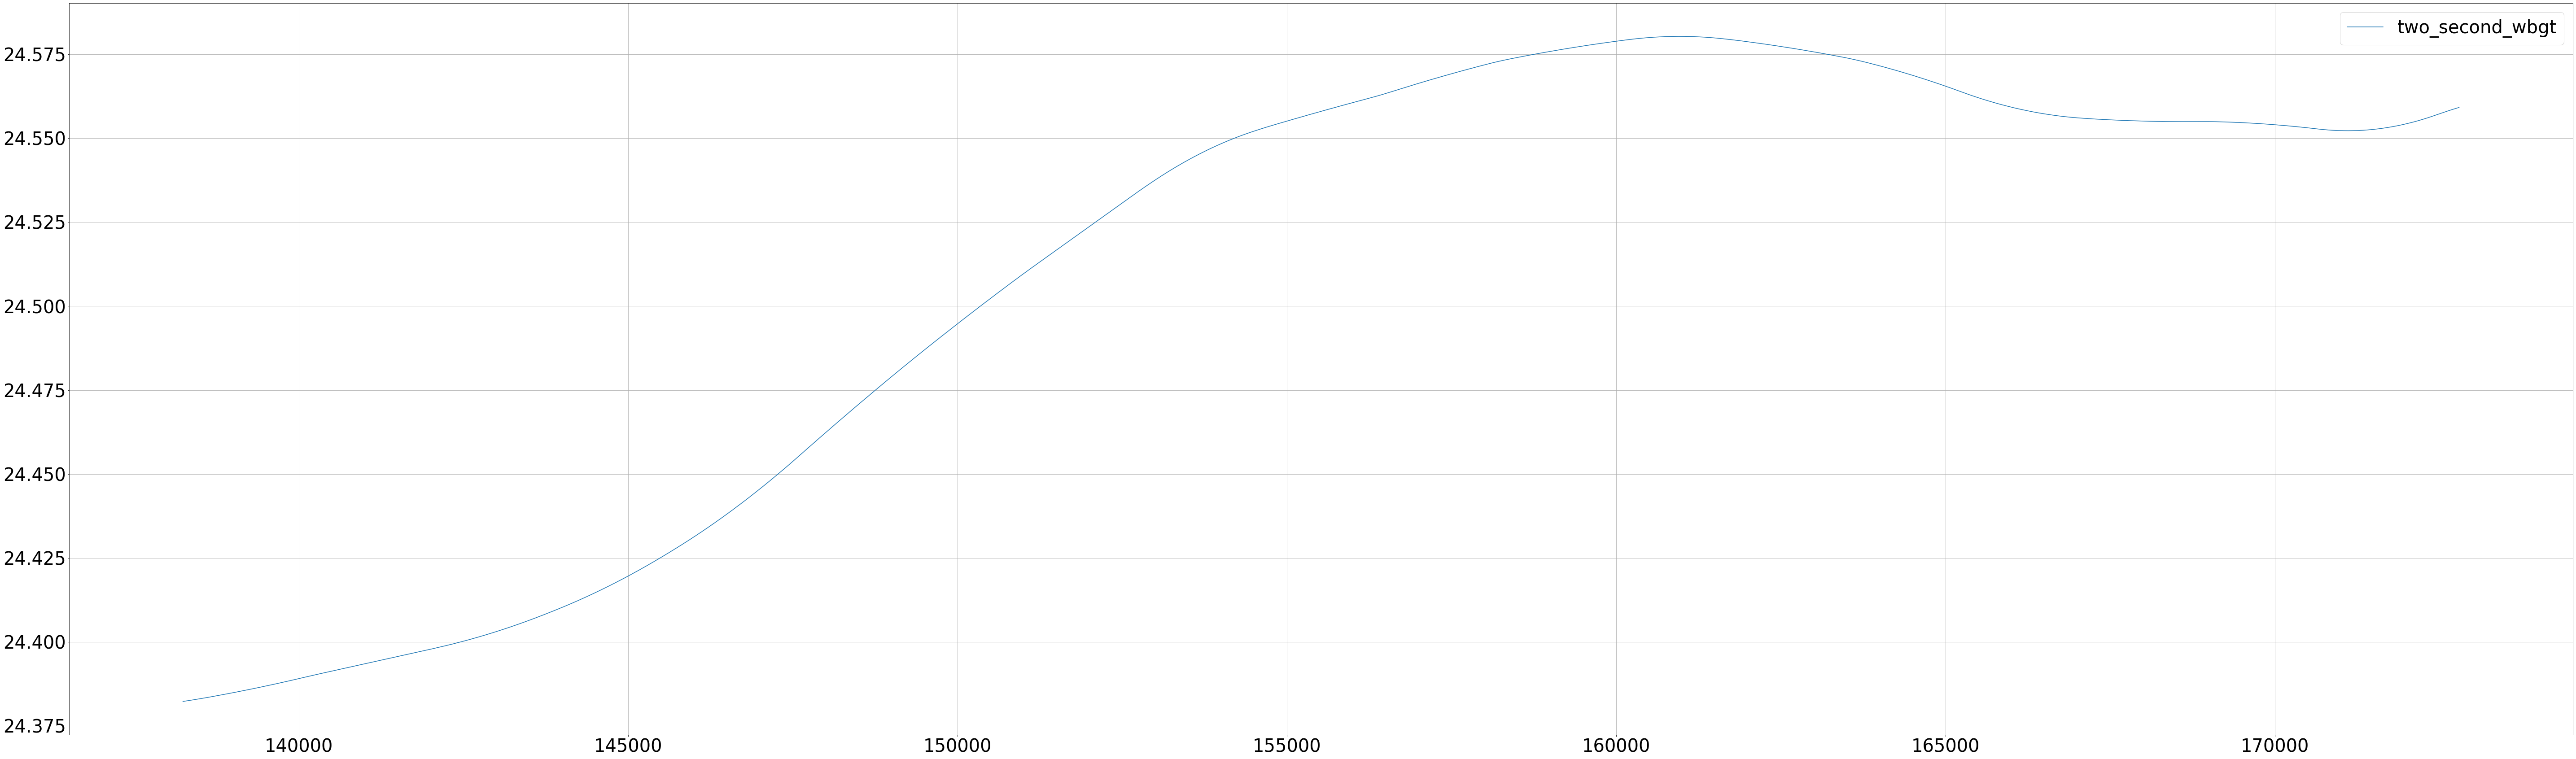

In [22]:
plt.rcParams.update({'font.size': 40})
#672 = 672 hours in one month
df_timeseries_mean = df_timeseries.rolling(window=window_value).mean()
df_timeseries_mean.plot( figsize =(100,30), grid =True)

<AxesSubplot:>

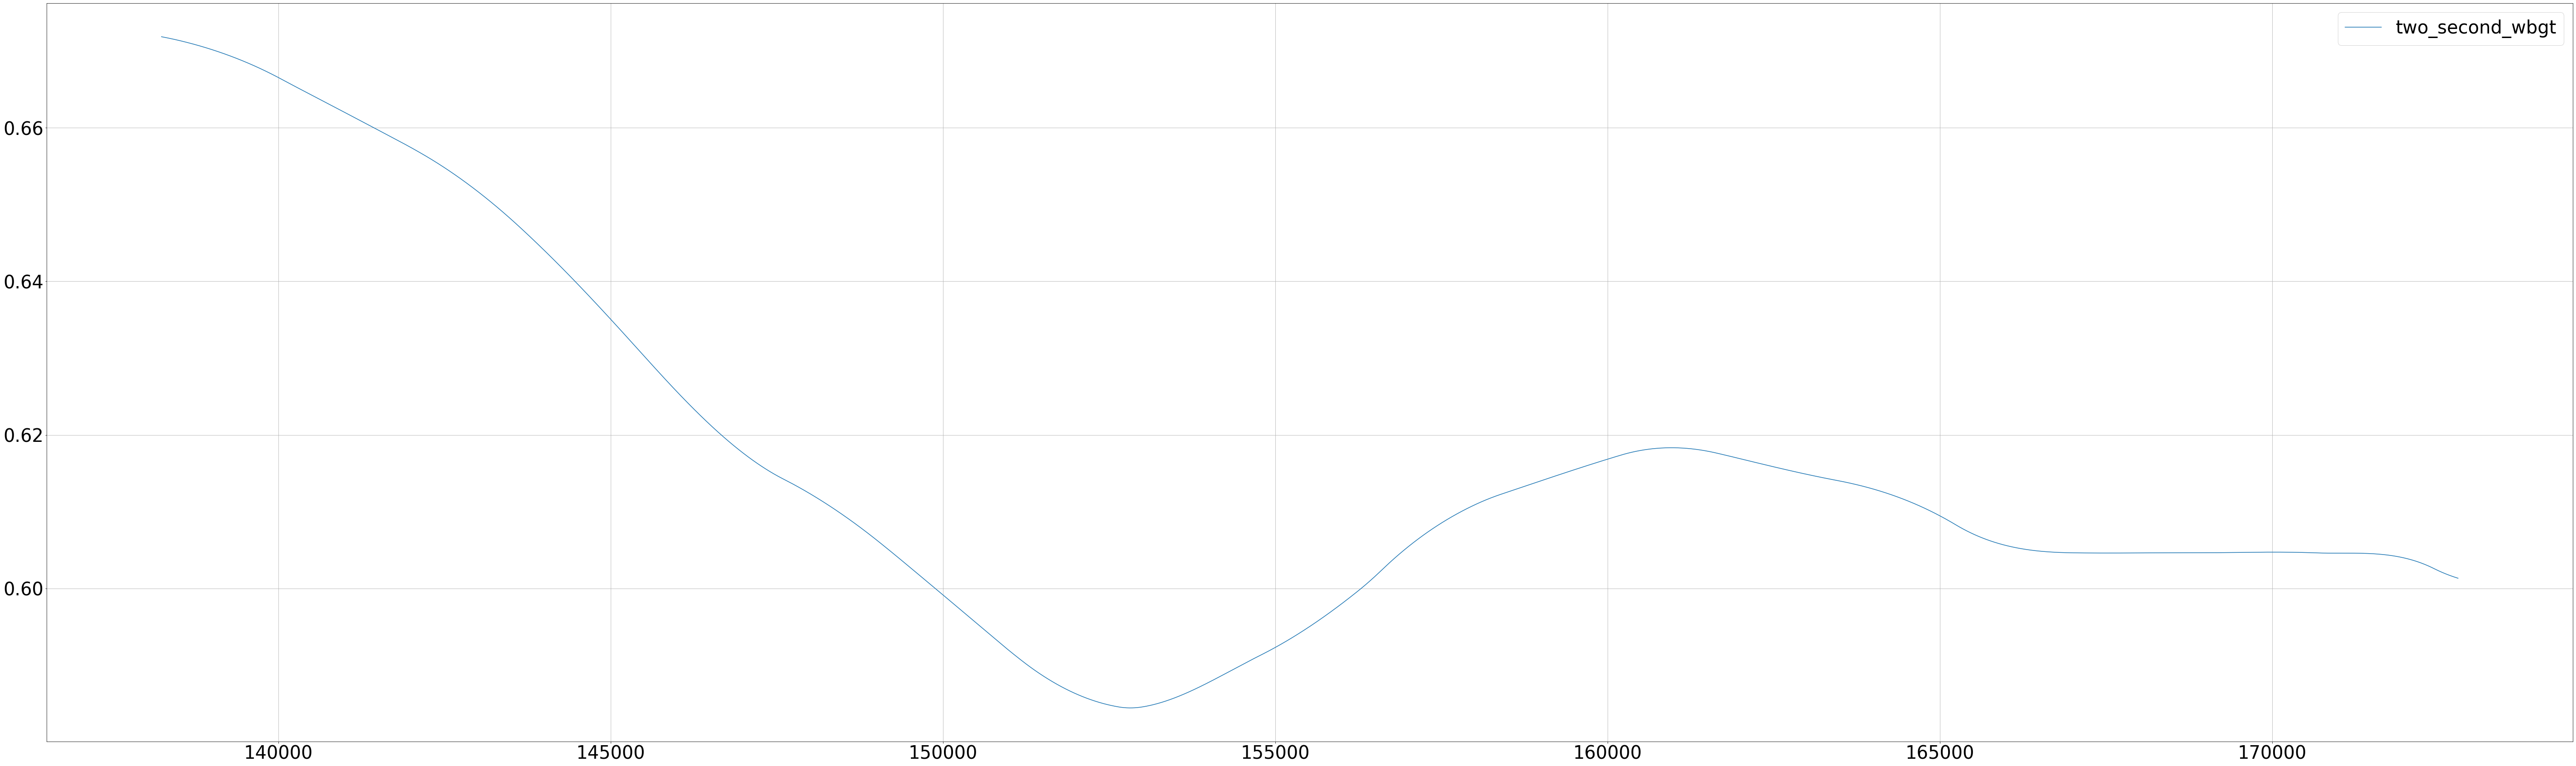

In [23]:
df_timeseries_std = df_timeseries.rolling(window=window_value).std()
df_timeseries_std.plot( figsize =(100,30), grid =True)

In [24]:
df_timeseries.shape[0]

172800

In [25]:

# train_size = math.floor(0.8*df_calculated_two_seconds.size)
# test_size =math.floor(df_calculated_two_seconds.size)
# train = df_calculated_two_seconds.two_second_wbgt[0:train_size]
# test = df_calculated_two_seconds.two_second_wbgt[train_size:test_size]
# NUMBER_OF_DAYS =1
NUMBER_OF_DATA_POINT =  math.floor(df_timeseries.shape[0])
train_size = math.floor(0.8*NUMBER_OF_DATA_POINT)
test_size =math.floor(NUMBER_OF_DATA_POINT)
train = df_timeseries.two_second_wbgt[0:train_size]
test = df_timeseries.two_second_wbgt[train_size:test_size]
print('train size = ',train_size,'test size = ', test_size)

train size =  138240 test size =  172800


<AxesSubplot:title={'center':'Train data vs Test data.'}>

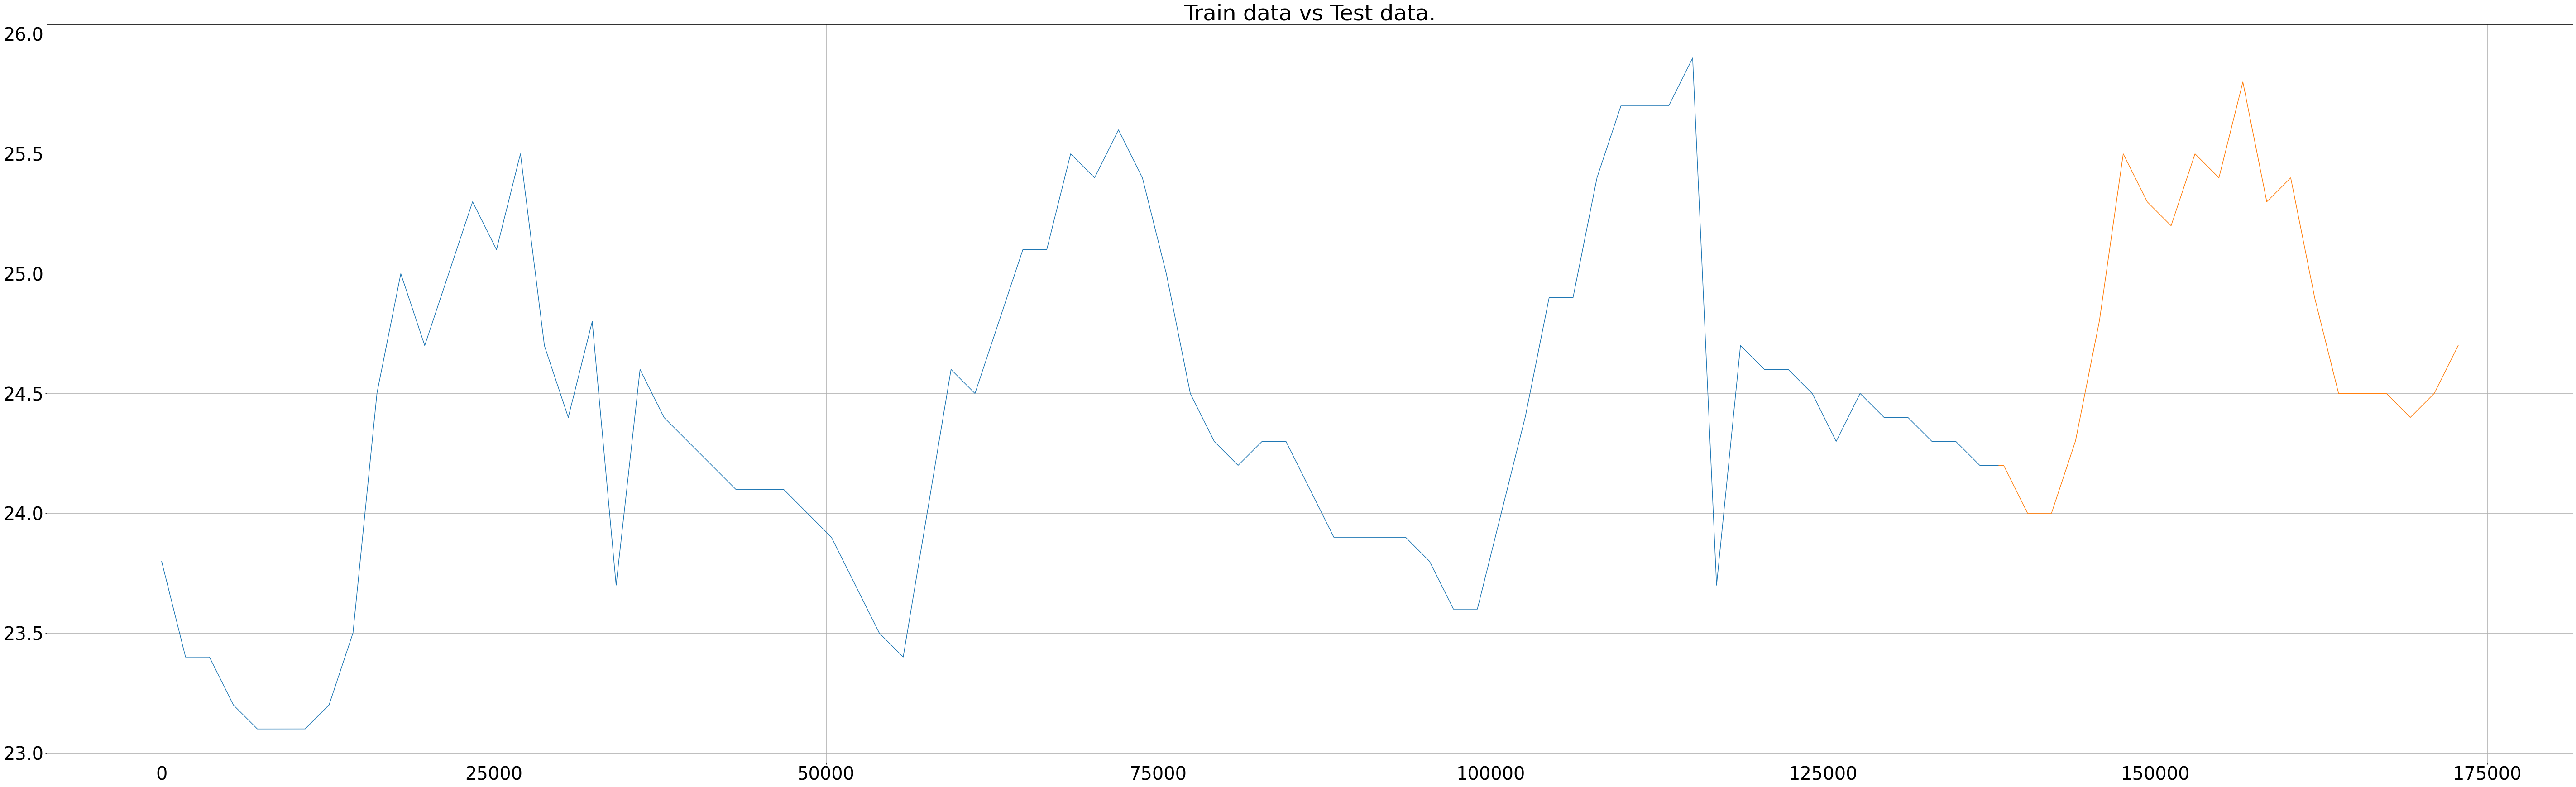

In [26]:
#plotting the data
train.plot()
test.plot(figsize =(100,30), grid =True,title='Train data vs Test data.')



In [27]:
#building the model
import pmdarima as pm
model = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-2753957.190, Time=18.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-2753965.190, Time=5.70 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2753963.190, Time=8.62 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-2753963.190, Time=9.49 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-2753961.190, Time=9.46 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-2827373.351, Time=15.27 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-2827371.351, Time=19.83 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-2827371.351, Time=19.16 sec


c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2827369.351, Time=26.56 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 132.208 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True)

In [28]:
model_seasonal = pm.auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True)
model_seasonal.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-2753957.190, Time=18.13 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-2753965.190, Time=5.58 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-2753963.190, Time=7.24 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-2753963.190, Time=8.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-2753961.190, Time=11.28 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-2827373.351, Time=15.40 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-2827371.351, Time=20.00 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-2827371.351, Time=19.61 sec


c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
c:\Users\Bernie\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2827369.351, Time=23.89 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 129.323 seconds


ARIMA(order=(0, 2, 0), scoring_args={}, suppress_warnings=True)

In [29]:
# make your forecasts
forecasts = model.predict(test.shape[0])

In [30]:
forecasts_seasonal = model_seasonal.predict(test.shape[0])

In [31]:
forecasts
np.max(forecasts)

25.160041668091818

In [32]:
forecasts_seasonal
np.max(forecasts_seasonal)

25.160041668091818

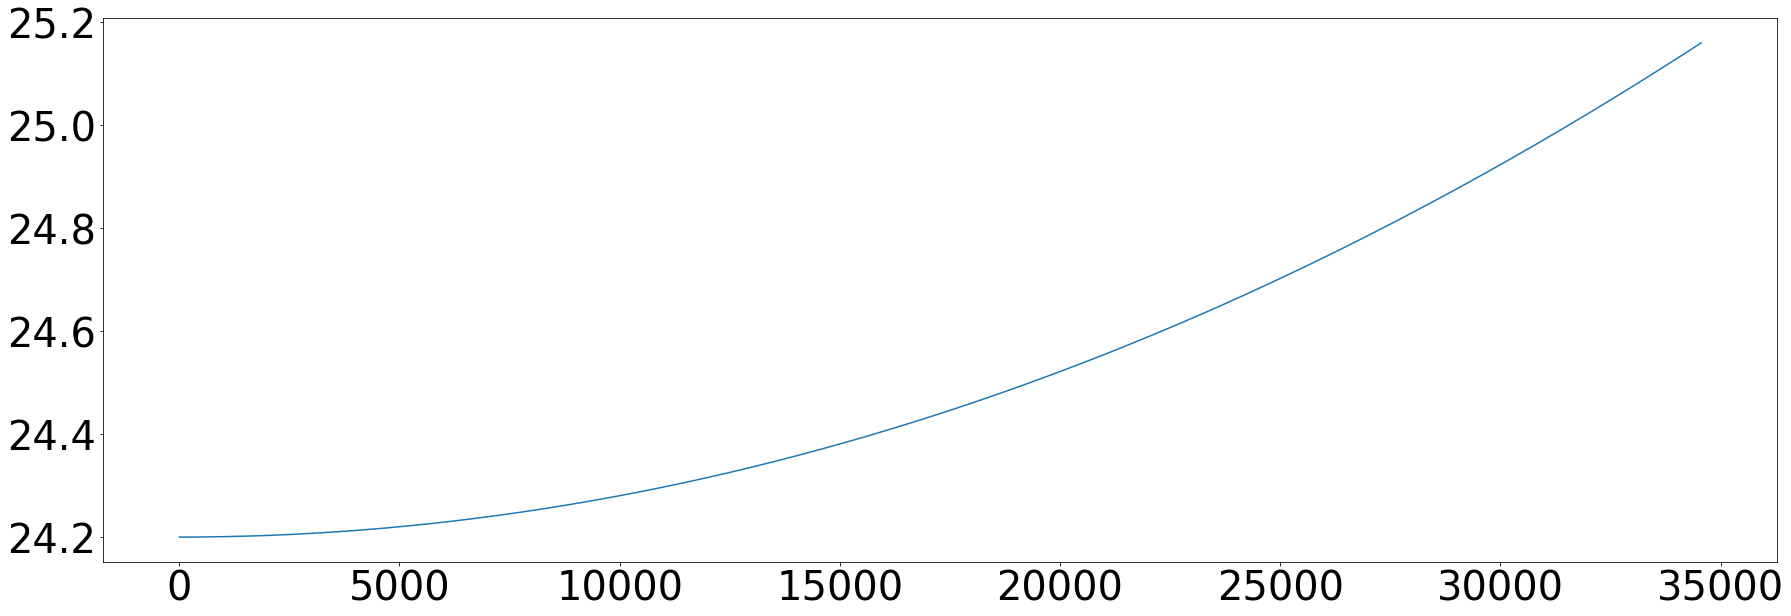

In [33]:
plt.figure(figsize=(30,10))
plt.plot(forecasts,label='forcast')
# plt.xlim([0, 50])
plt.show()

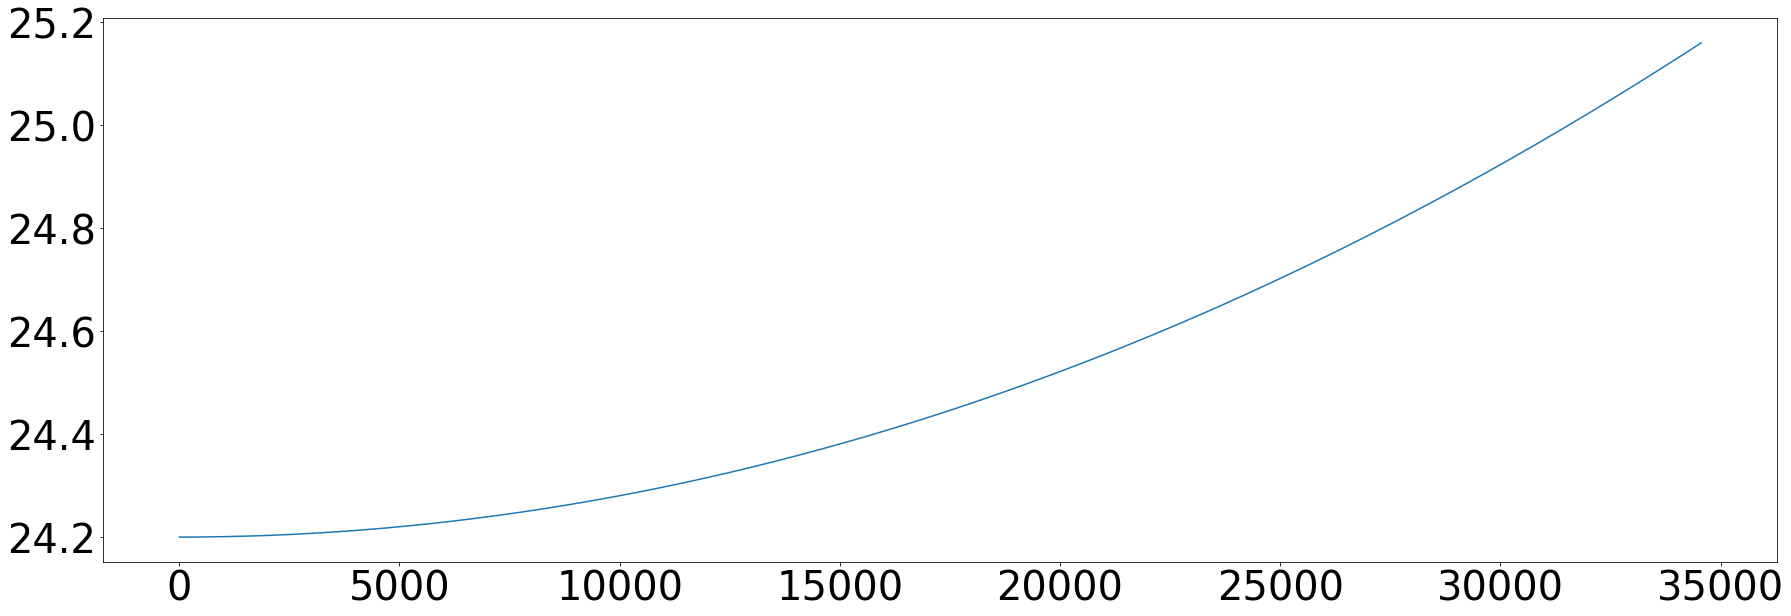

In [34]:
plt.figure(figsize=(30,10))
plt.plot(forecasts_seasonal,label='forcast')
#  plt.xlim([0, 50])
plt.show()

In [35]:
forecasts.size

34560

In [36]:
forecasts_seasonal.size

34560

In [37]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt


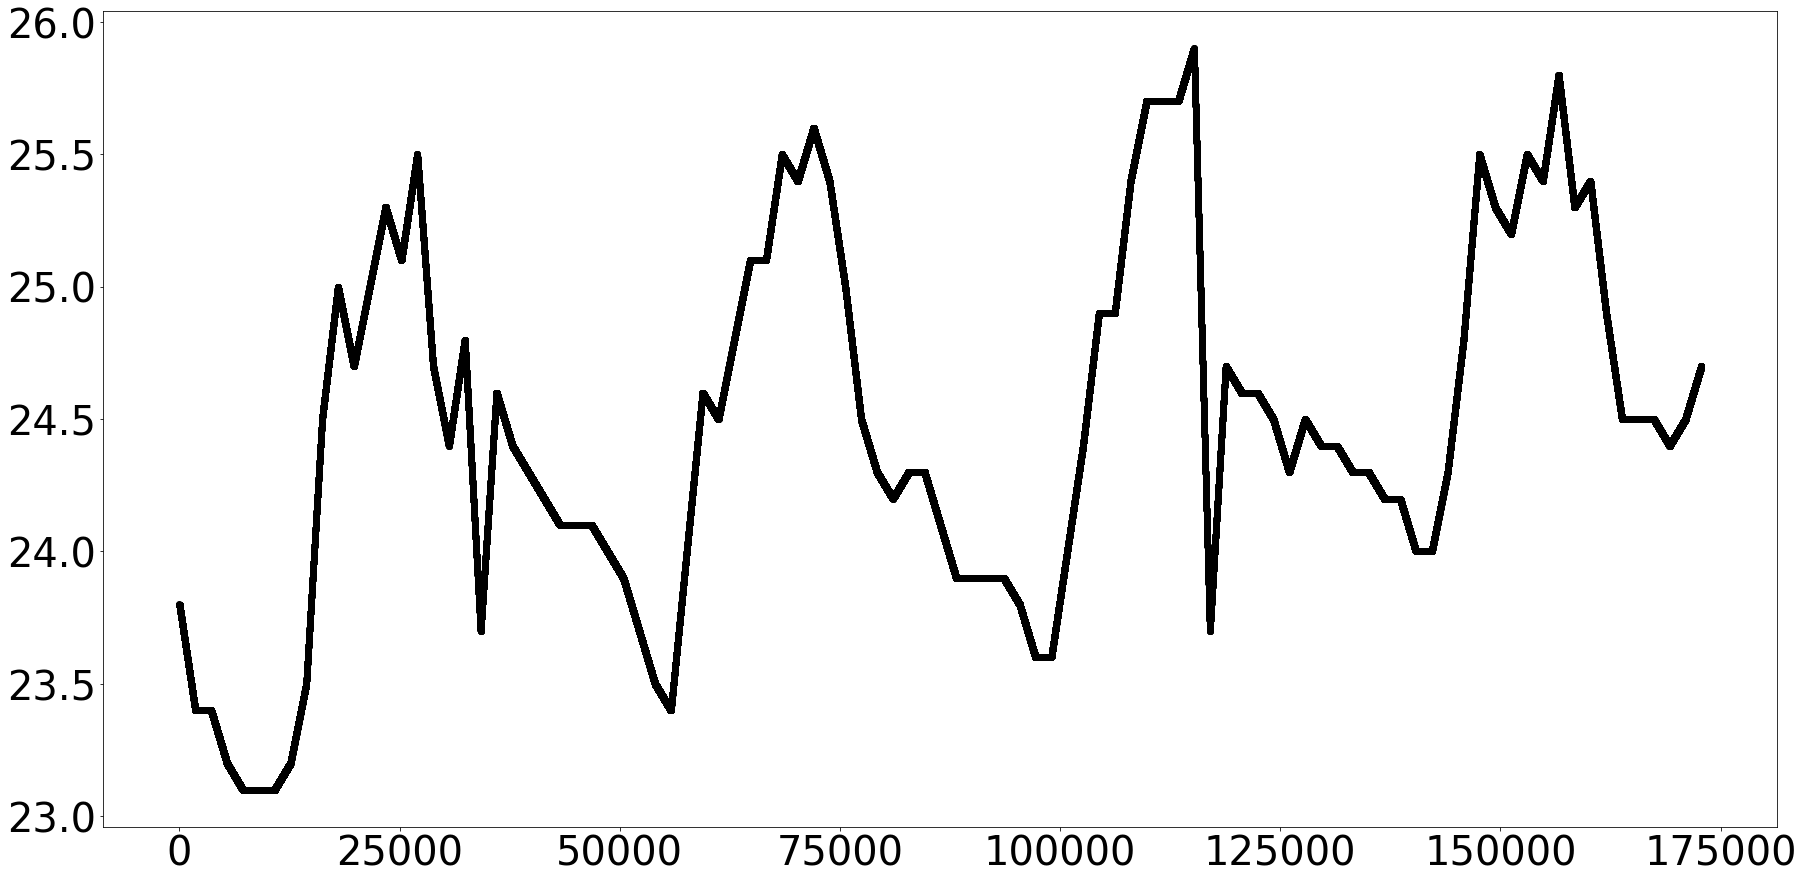

In [38]:
fit1 = SimpleExpSmoothing(df_timeseries.two_second_wbgt, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False
)
fcast1 = fit1.forecast(10000).rename(r"$\alpha=0.2$")
fit2 = SimpleExpSmoothing(df_timeseries.two_second_wbgt, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False
)
fcast2 = fit2.forecast(10000).rename(r"$\alpha=0.6$")
fit3 = SimpleExpSmoothing(df_timeseries.two_second_wbgt, initialization_method="estimated").fit()
fcast3 = fit3.forecast(10000).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(30, 15))
plt.plot(df_timeseries.two_second_wbgt, marker="o", color="black")


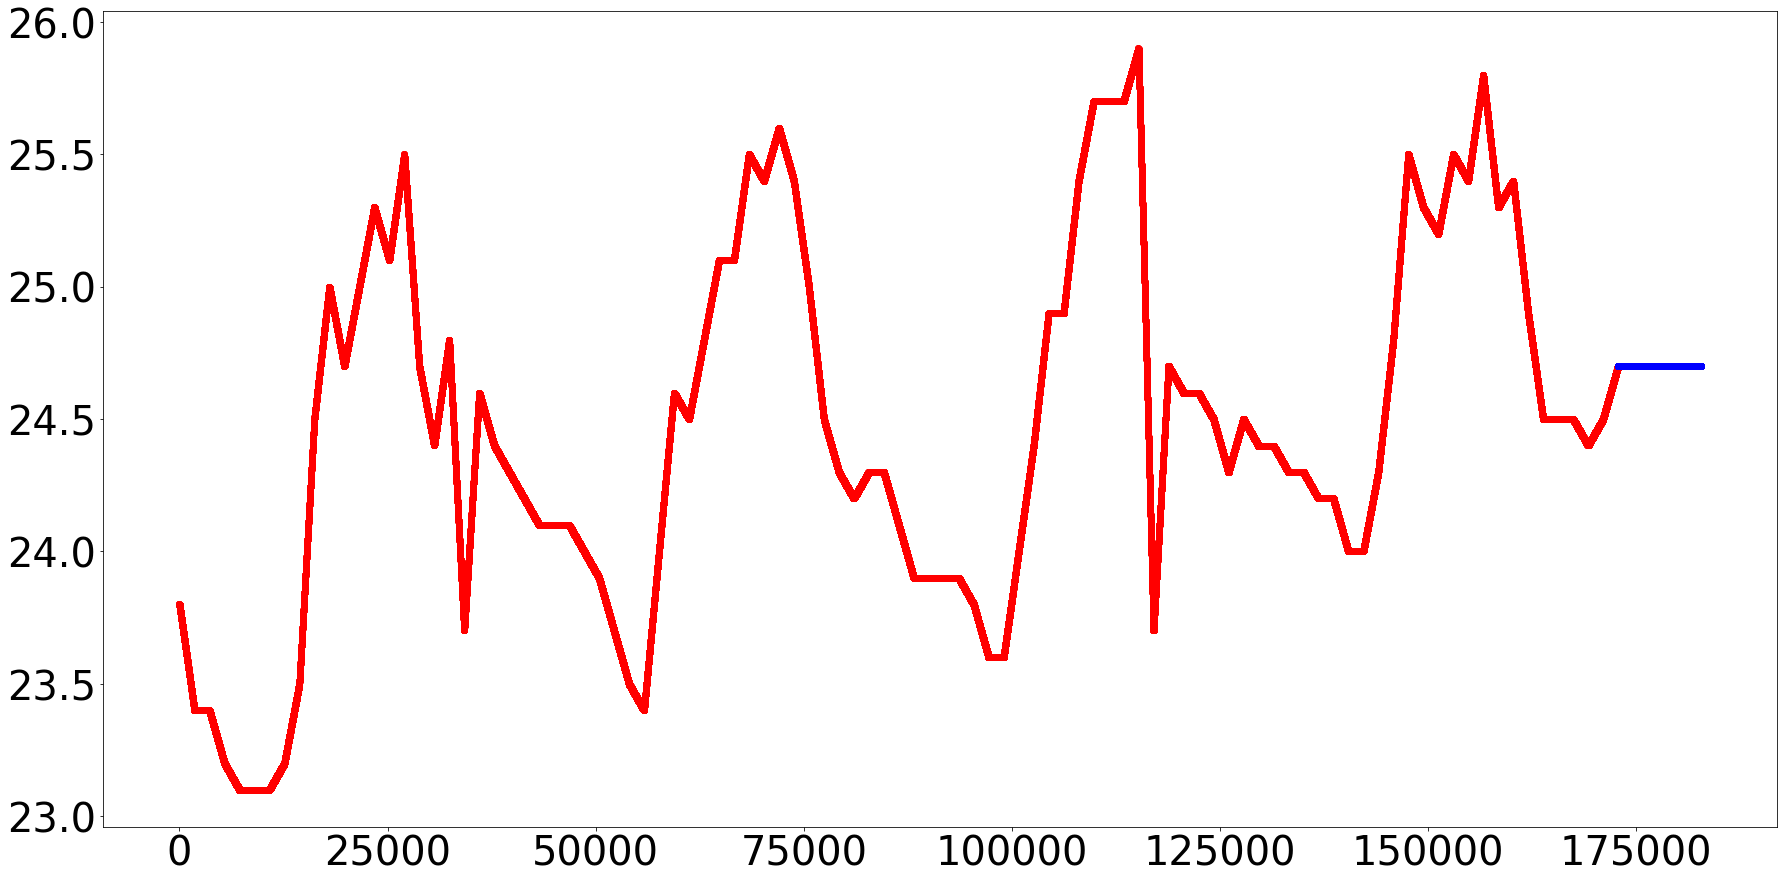

In [39]:
plt.figure(figsize=(30, 15))
plt.plot(fit1.fittedvalues, marker="o", color="red")
(line1,) = plt.plot(fcast1, marker="o", color="blue")


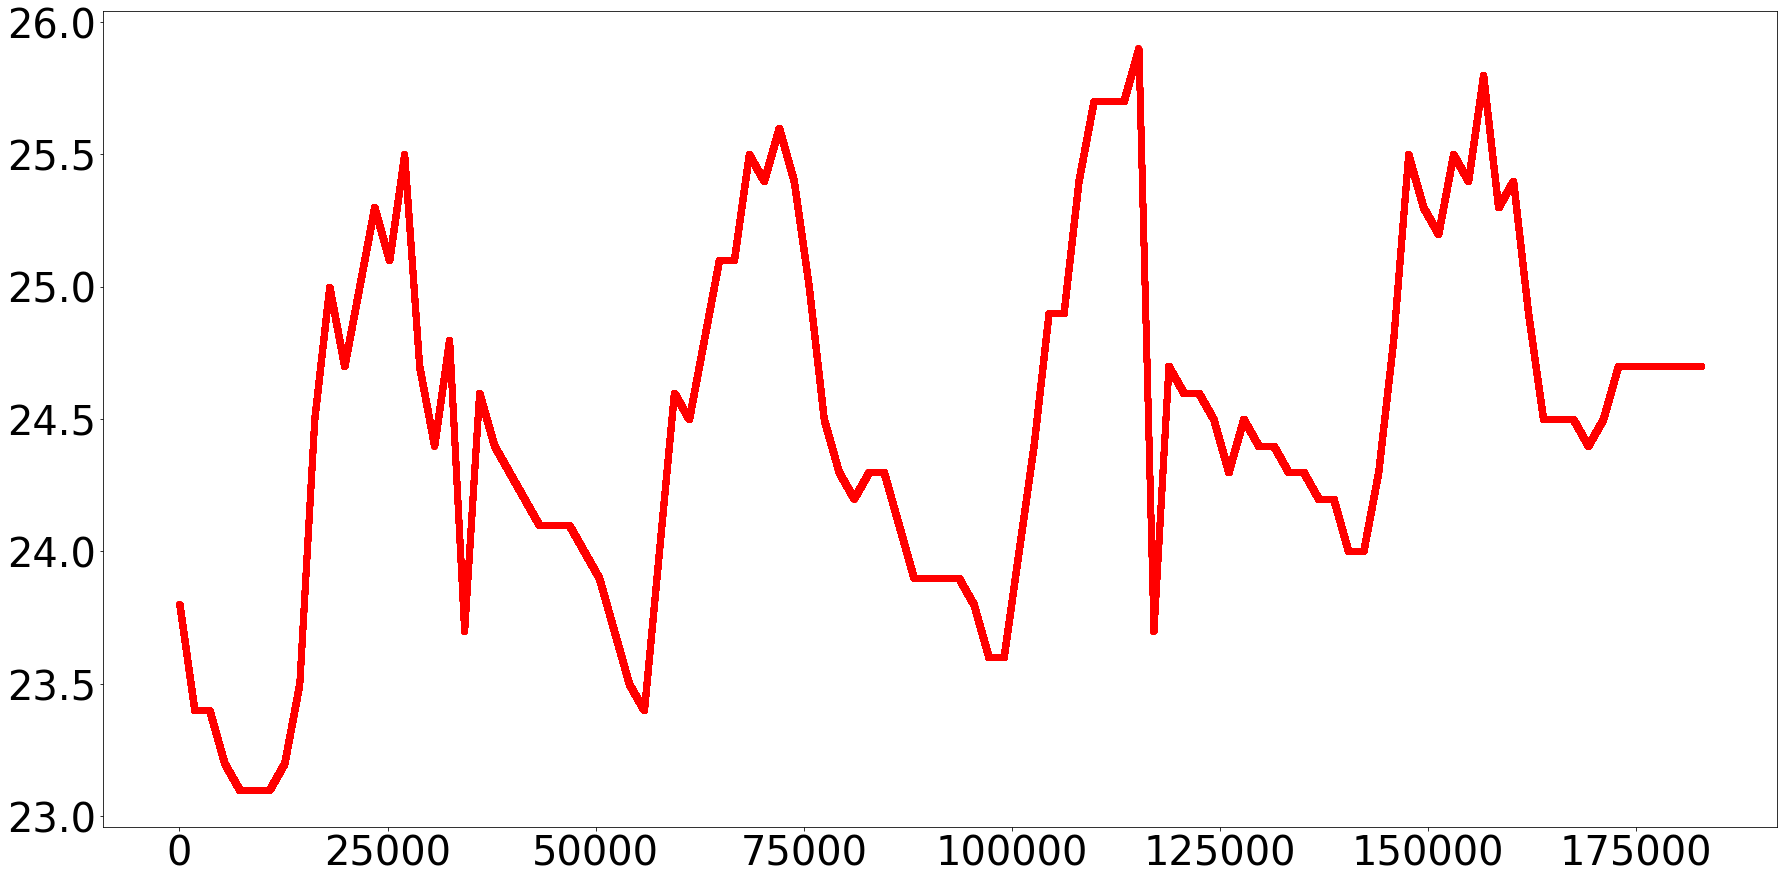

In [40]:
plt.figure(figsize=(30, 15))
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")


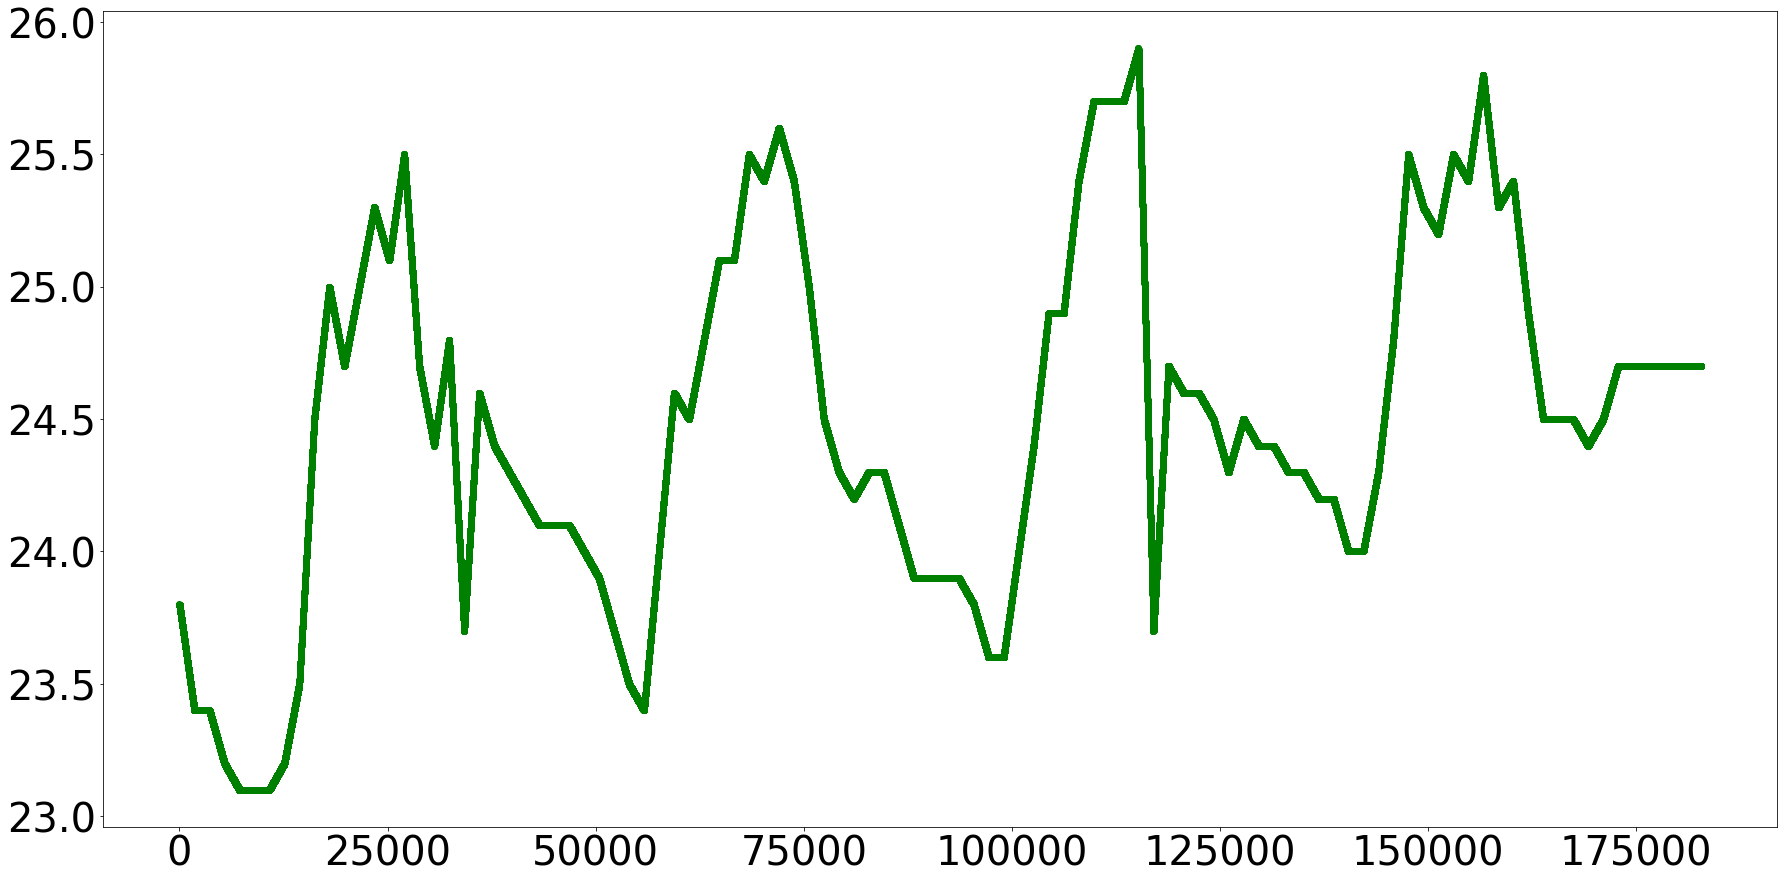

In [41]:
plt.figure(figsize=(30, 15))
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
#plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [42]:
# plt.figure(figsize=(30, 15))
# plt.plot(df_timeseries.two_second_wbgt, marker="o", color="black")
# plt.plot(fit1.fittedvalues, marker="o", color="blue")
# (line1,) = plt.plot(fcast1, marker="o", color="blue")
# plt.plot(fit2.fittedvalues, marker="o", color="red")
# (line2,) = plt.plot(fcast2, marker="o", color="red")
# plt.plot(fit3.fittedvalues, marker="o", color="green")
# (line3,) = plt.plot(fcast3, marker="o", color="green")
# plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

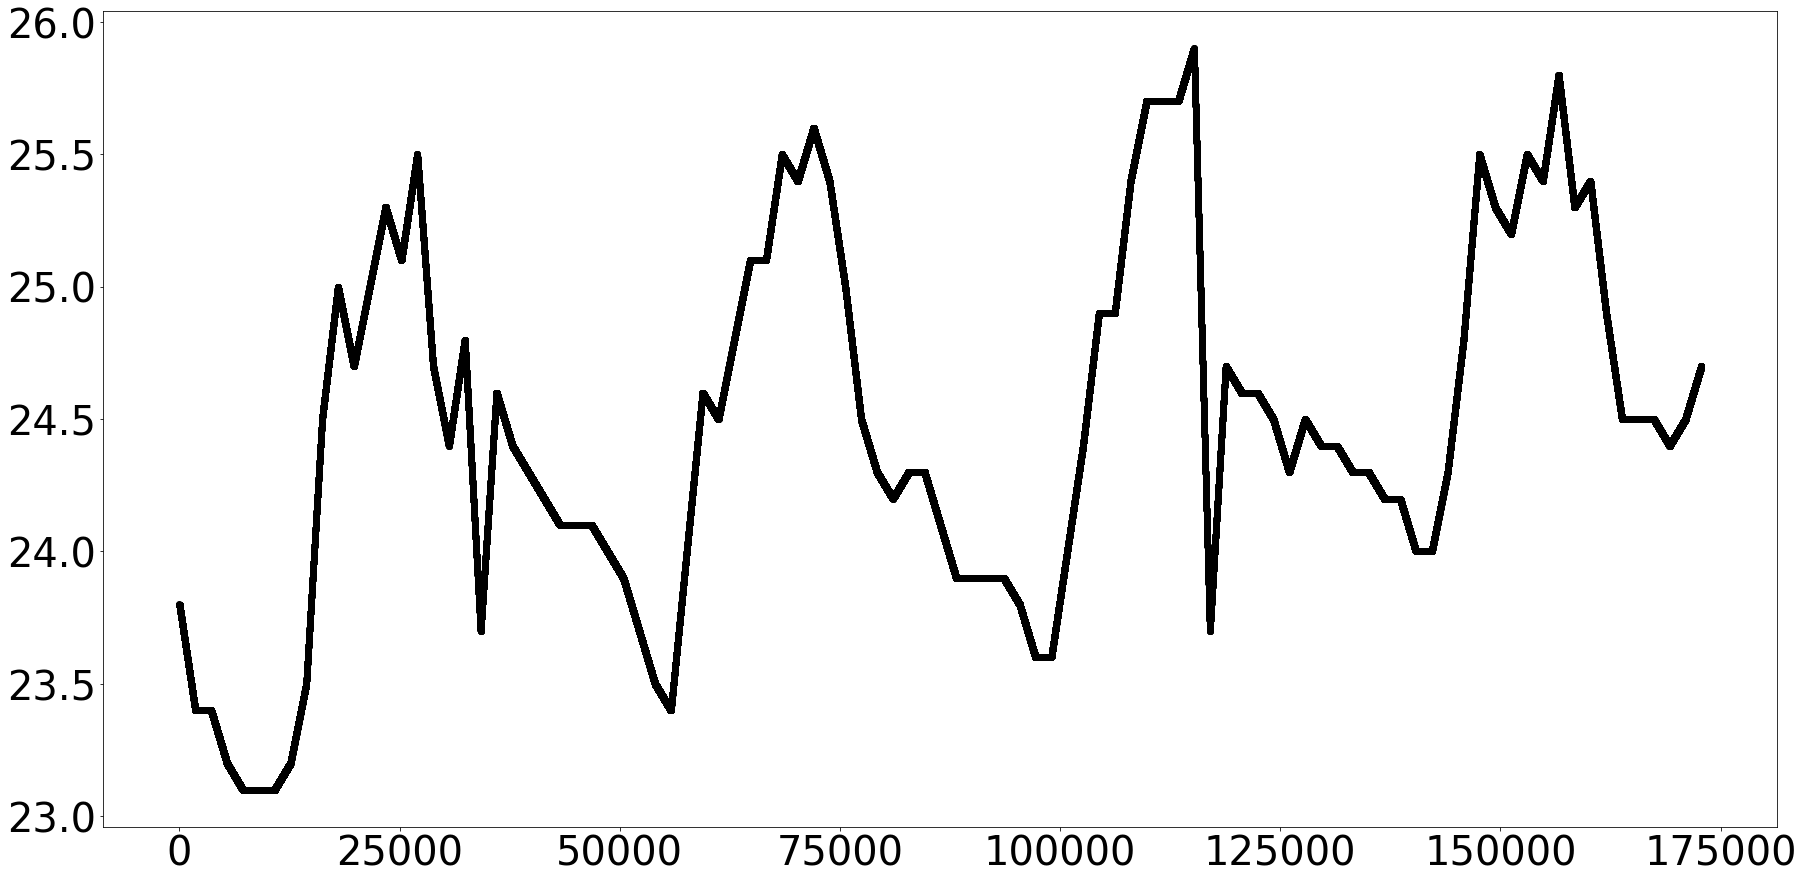

In [43]:
fit1 = Holt(df_timeseries.two_second_wbgt, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast1 = fit1.forecast(10000).rename("Holt's linear trend")
fit2 = Holt(df_timeseries.two_second_wbgt, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False
)
fcast2 = fit2.forecast(10000).rename("Exponential trend")
fit3 = Holt(df_timeseries.two_second_wbgt, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2
)
fcast3 = fit3.forecast(10000).rename("Additive damped trend")

plt.figure(figsize=(30, 15))
plt.plot(df_timeseries.two_second_wbgt, marker="o", color="black")


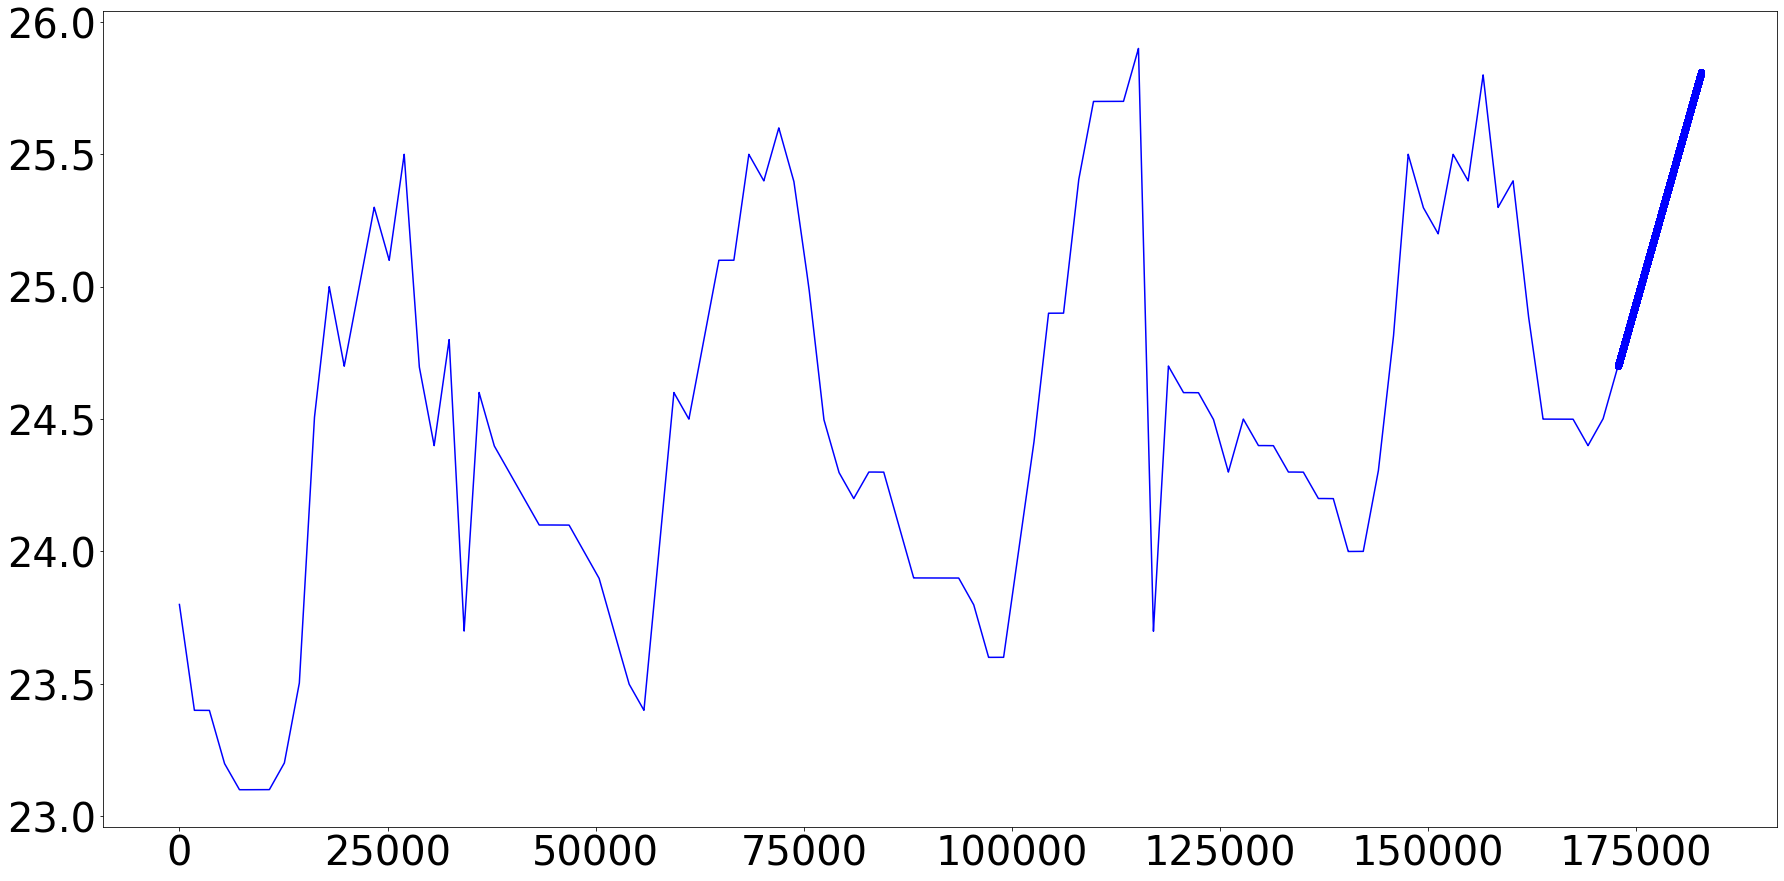

In [44]:
plt.figure(figsize=(30, 15))
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")


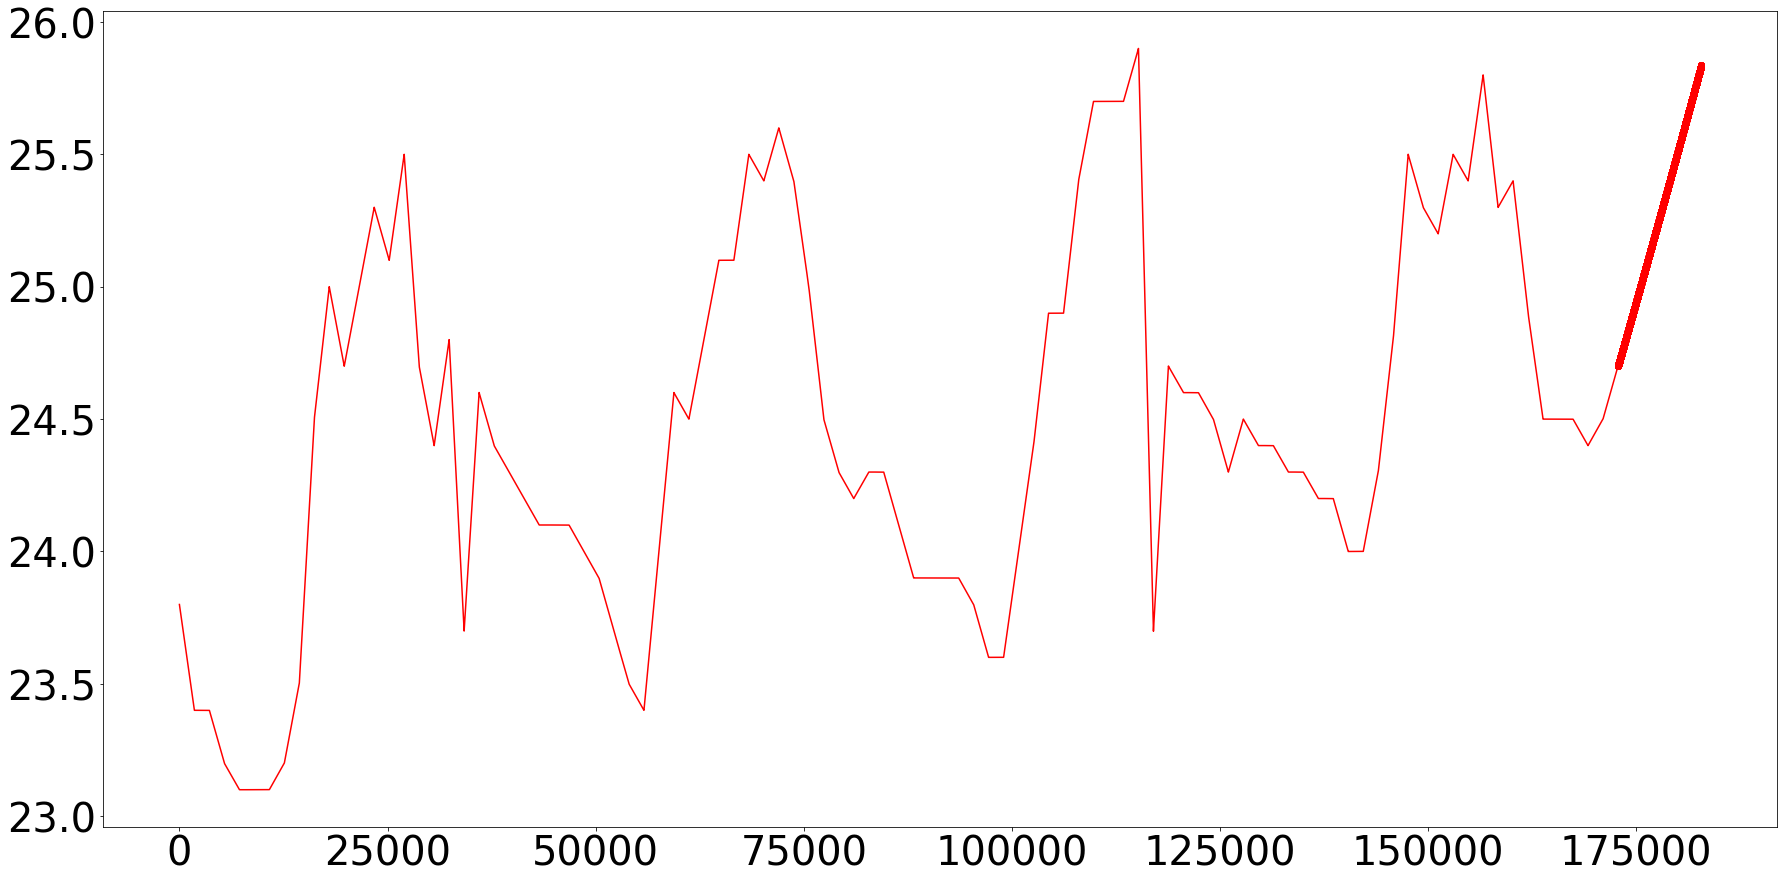

In [45]:
plt.figure(figsize=(30, 15))
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")


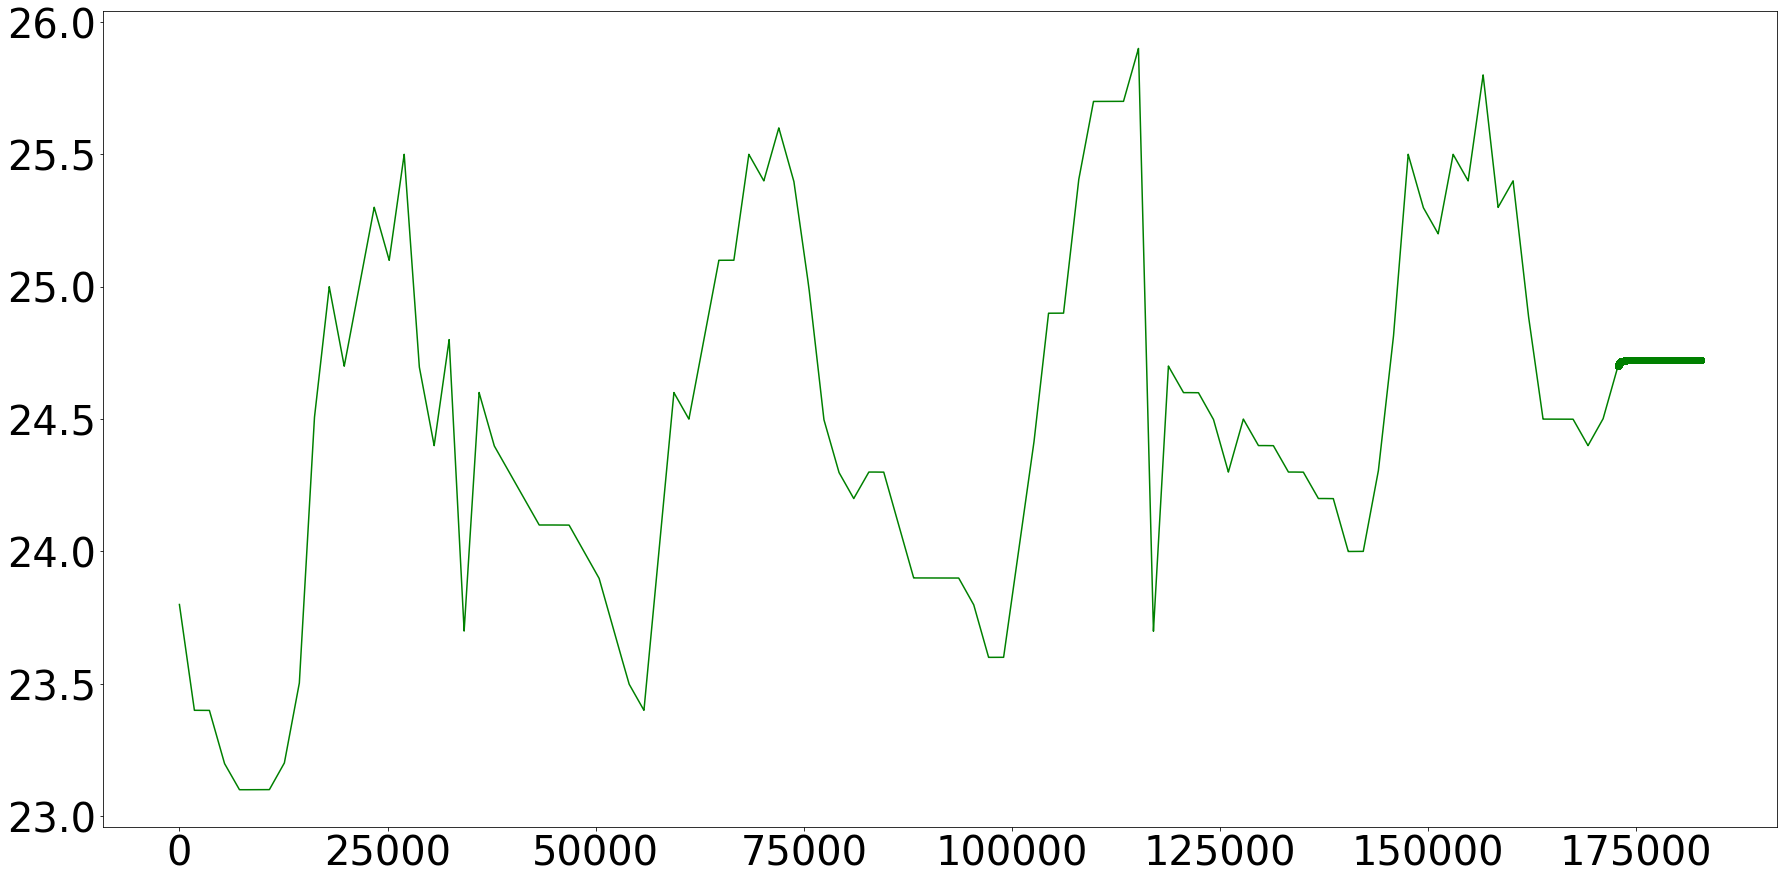

In [46]:
plt.figure(figsize=(30, 15))
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
#plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

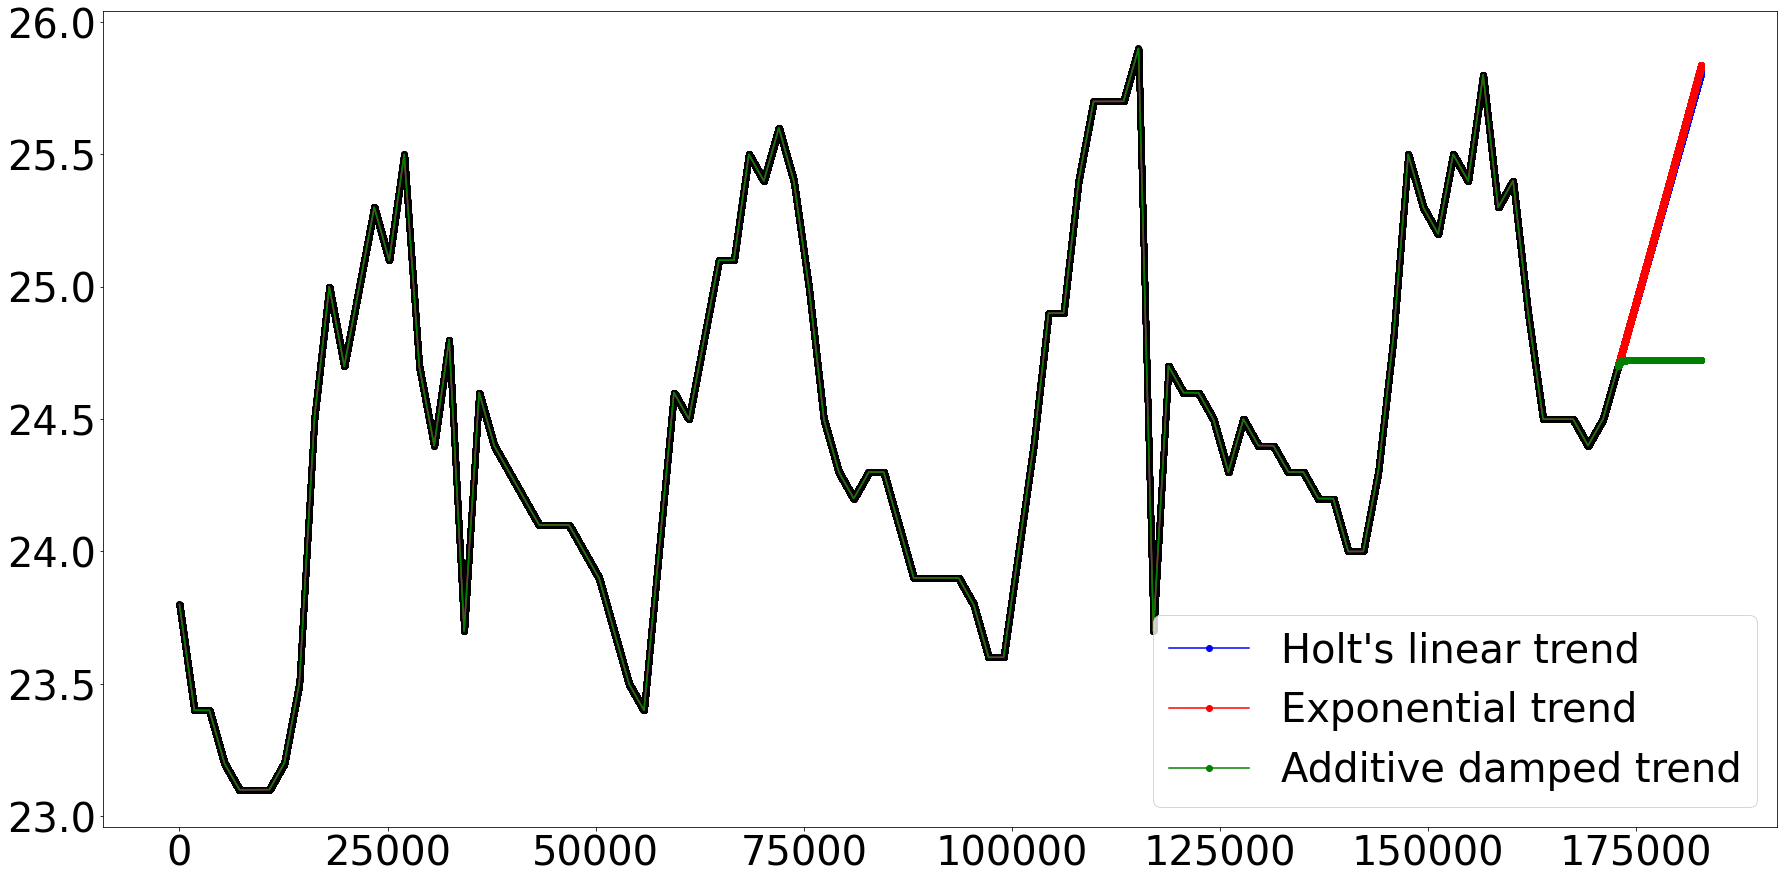

In [47]:
plt.figure(figsize=(30, 15))
plt.plot(df_timeseries.two_second_wbgt, marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


<ipython-input-48-4acf36acb0d9>:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holtFit1 = Holt(df_timeseries.two_second_wbgt).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
<ipython-input-48-4acf36acb0d9>:5: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holtFit2 = Holt(df_timeseries.two_second_wbgt, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
<ipython-input-48-4acf36acb0d9>:8: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  holtFit3 = Holt(df_timeseries.two_second_wbgt, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
<ipython-input-48-4acf36acb0d9>:8: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holtFit3 = Holt(df_timeseries.two_second_wbgt, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)


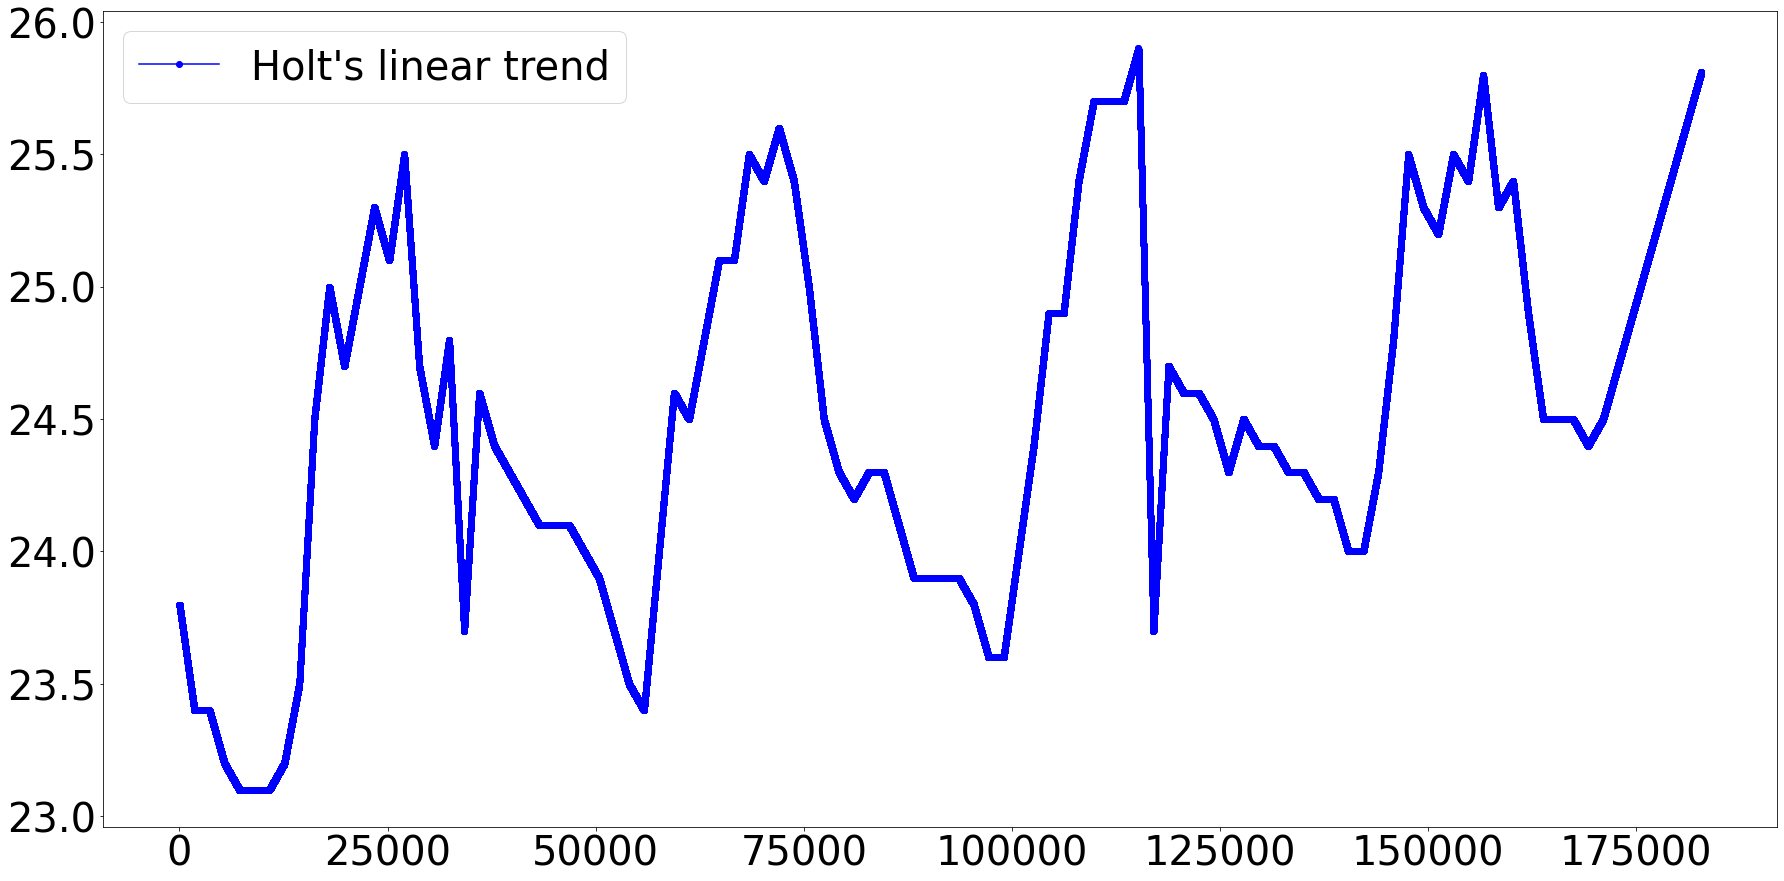

In [48]:
plt.figure(figsize=(30, 15))
holtFit1 = Holt(df_timeseries.two_second_wbgt).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
holtFcast1 = fit1.forecast(10000).rename("Holt's linear trend")

holtFit2 = Holt(df_timeseries.two_second_wbgt, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
holtFcast2 = fit2.forecast(10000).rename("Exponential trend")

holtFit3 = Holt(df_timeseries.two_second_wbgt, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
holtFcast3 = fit3.forecast(10000).rename("Additive damped trend")


holtFit1.fittedvalues.plot(marker="o", color='blue')
holtFcast1.plot(color='blue', marker="o", legend=True)
plt.show()

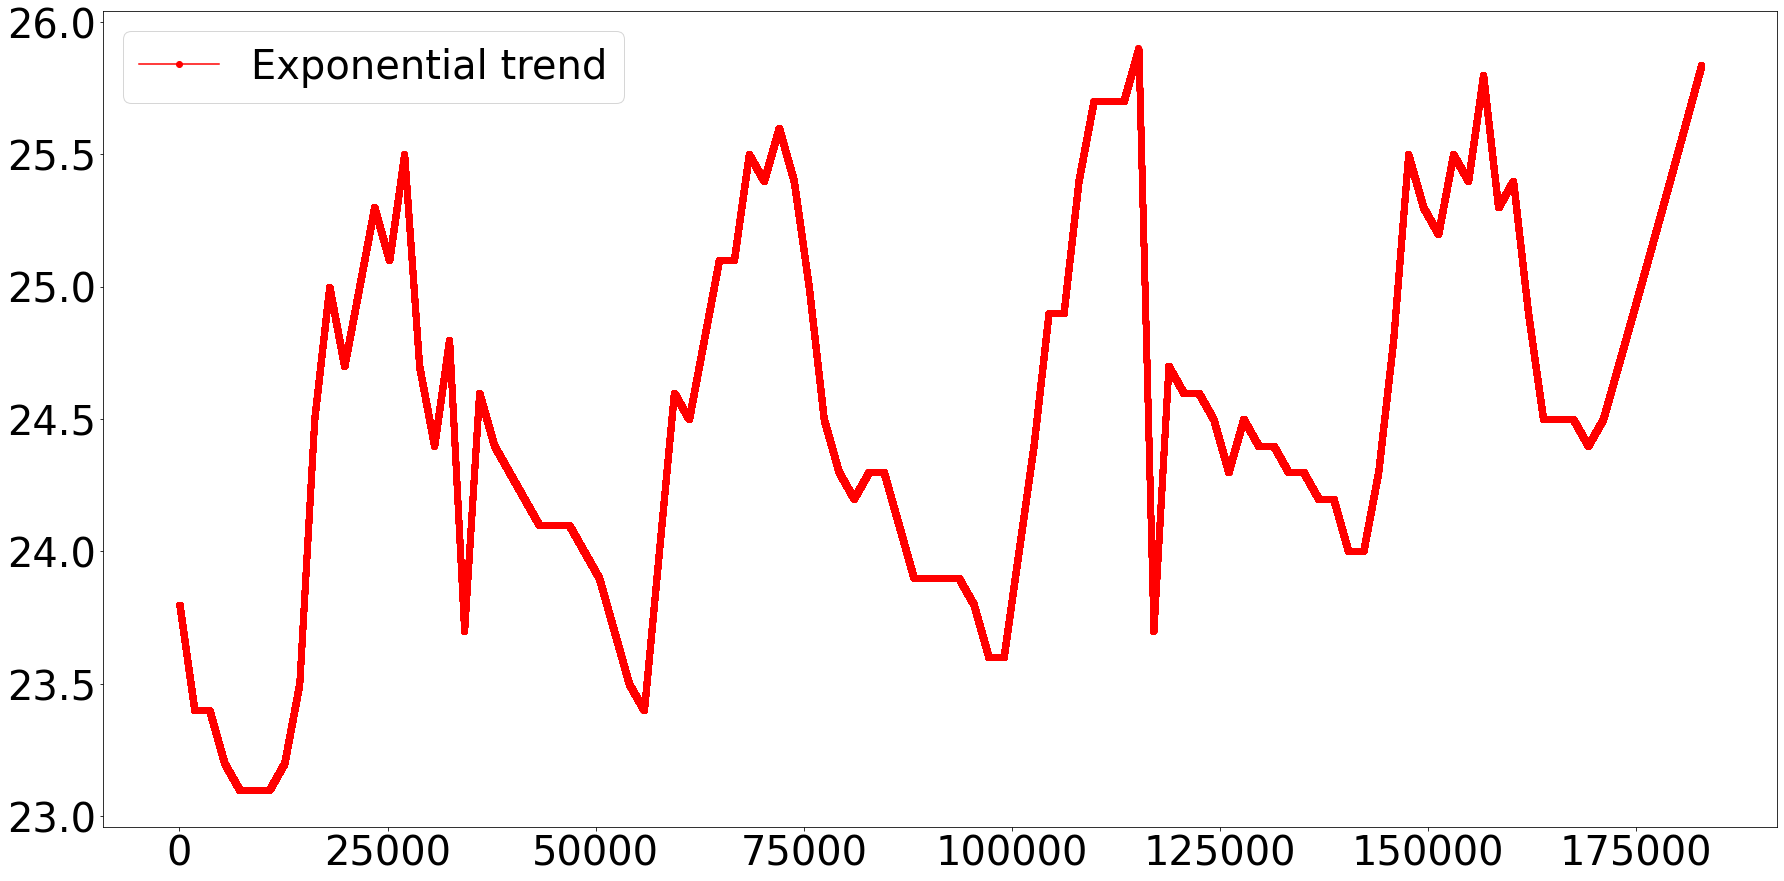

In [49]:
plt.figure(figsize=(30, 15))
holtFit2.fittedvalues.plot(marker="o", color='red')
holtFcast2.plot(color='red', marker="o", legend=True)
plt.show()


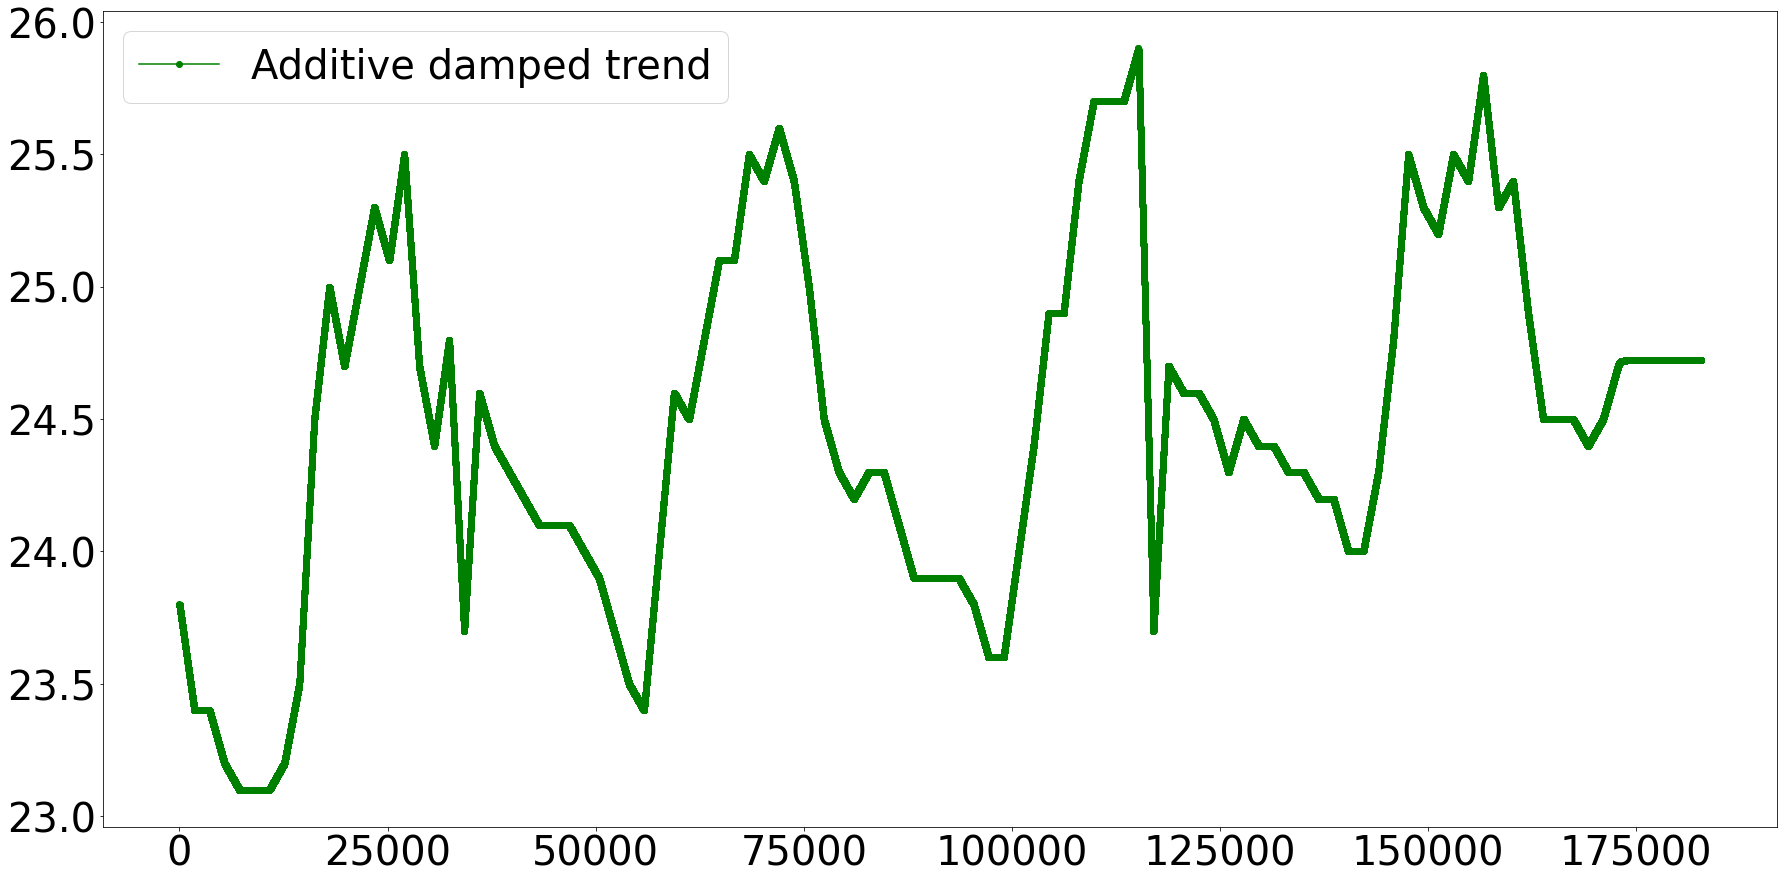

In [50]:
plt.figure(figsize=(30, 15))
holtFit3.fittedvalues.plot(marker="o", color='green')
holtFcast3.plot(color='green', marker="o", legend=True)
plt.show()